In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from linearmodels.panel import PanelOLS
from linearmodels.panel import compare
import datetime
import pickle


# 데이터 읽기 및 전처리

cond1_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition1.csv")
cond1_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition1.csv")
cond1_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition1.csv")
cond1_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition1.csv")


# cond1_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition1_1.csv")
# cond1_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition1_1.csv")
# cond1_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition1_1.csv")
# cond1_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition1_1.csv")


cond2_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition2.csv")
cond2_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition2.csv")
cond2_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition2.csv")
cond2_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition2.csv")


# cond2_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition2_1.csv")
# cond2_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition2_1.csv")
# cond2_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition2_1.csv")
# cond2_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition2_1.csv")

cond3_treat_0_1 = pd.read_csv("../../data/treat_0_1_condition3.csv")
cond3_treat_0_2 = pd.read_csv("../../data/treat_0_2_condition3.csv")
cond3_treat_0_3 = pd.read_csv("../../data/treat_0_3_condition3.csv")
cond3_treat_0_4 = pd.read_csv("../../data/treat_0_4_condition3.csv")

cond3_treat_1_1 = pd.read_csv("../../data/treat_1_1_condition3.csv")
cond3_treat_1_2 = pd.read_csv("../../data/treat_1_2_condition3.csv")
cond3_treat_1_3 = pd.read_csv("../../data/treat_1_3_condition3.csv")
cond3_treat_1_4 = pd.read_csv("../../data/treat_1_4_condition3.csv")

# 데이터 읽기 및 전처리
df_topic_day = pd.read_csv("../../R/data/topic_day_panel.csv")

# 파일 불러오기
with open('../../data/df_postcnt_per_tag.pkl', 'rb') as f:
    df_postcnt_per_tag = pickle.load(f)


# 파일 불러오기
with open('../../data/df_postcnt_per_tag_01.pkl', 'rb') as f:
    df_postcnt_per_tag_not_calc = pickle.load(f)

df_deletedQ_cond = pd.read_csv("../../data/deletedQ_cond.csv")


# 파일 불러오기
with open('../../data/df_da.pkl', 'rb') as f:
    df_da = pickle.load(f)

# 파일 불러오기
with open('../../data/df_da.pkl', 'rb') as f:
    df_da = pickle.load(f)


with open('../../data/df_postcnt_per_tag_year.pkl', 'rb') as f:
    df_postcnt_per_tag_year = pickle.load(f)





전처리

In [2]:
cond_treat0_s = (df_postcnt_per_tag['cdate']>= '2021-10-06')
cond_treat0_e = (df_postcnt_per_tag['cdate']<= '2022-03-15')

cond_treat1_s = (df_postcnt_per_tag['cdate']>= '2022-10-05')
cond_treat1_e = (df_postcnt_per_tag['cdate']<= '2023-03-14')


In [3]:
cond_treat0_not_s = (df_postcnt_per_tag_not_calc['cdate']>= '2021-10-06')
cond_treat0_not_e = (df_postcnt_per_tag_not_calc['cdate']<= '2022-03-15')

cond_treat1_not_s = (df_postcnt_per_tag_not_calc['cdate']>= '2022-10-05')
cond_treat1_not_e = (df_postcnt_per_tag_not_calc['cdate']<= '2023-03-14')


df_postcnt_per_tag_not_calc

,cdate,python,javascript,reactjs,java,c#,html,r,pandas,css,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
0,2008-07-31,0,0,0,0,3,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,2008-08-01,0,0,0,2,8,3,0,0,0,...,0,0,0,9,0,0,0,0,0,3
2,2008-08-02,4,0,0,2,4,0,0,0,0,...,0,0,0,2,0,0,1,0,0,0
3,2008-08-03,5,1,0,0,5,1,0,0,1,...,0,0,0,5,0,0,1,0,0,0
4,2008-08-04,3,1,0,0,10,2,0,0,1,...,0,0,0,6,0,2,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,2023-11-29,488,248,129,184,159,103,95,57,74,...,20,27,26,54,34,11,15,34,17,38
5600,2023-11-30,486,304,165,150,159,119,90,45,86,...,24,19,24,30,34,18,13,30,25,33
5601,2023-12-01,364,281,136,144,142,121,77,35,76,...,23,22,17,52,20,24,14,26,18,38
5602,2023-12-02,286,196,92,111,72,81,30,18,58,...,10,16,11,24,10,11,9,23,6,32


In [4]:
cond3_treat_0_1.columns[:]

Index(['cdate', 'del_yn', 'python', 'javascript', 'reactjs', 'java', 'c#',
       'html', 'r', 'pandas', 'css', 'flutter', 'sql', 'android', 'nodejs',
       'cplusplus', 'typescript', 'php', 'python_3x', 'dataframe', 'arrays',
       'angular', 'django', 'json', 'dart', 'mysql', 'c', 'excel', 'laravel',
       'swift', 'spring_boot', 'amazon_web_services', 'react_native',
       'postgresql', 'azure', 'kotlin', 'docker', 'list', 'firebase', 'ios',
       'sql_server', 'jquery', 'mongodb', 'vuejs', 'numpy', 'net', 'vba',
       'regex', 'string', 'spring', 'powershell', 'linux'],
      dtype='object')

In [5]:
# a.python_yn / a.tot              as python_yn,

' '.join(['CAST(a.'+x+'_yn AS NUMERIC)/ a.tot    as    '+x+'_yn , ' for x in cond3_treat_0_1.columns[2:]])

'CAST(a.python_yn AS NUMERIC)/ a.tot    as    python_yn ,  CAST(a.javascript_yn AS NUMERIC)/ a.tot    as    javascript_yn ,  CAST(a.reactjs_yn AS NUMERIC)/ a.tot    as    reactjs_yn ,  CAST(a.java_yn AS NUMERIC)/ a.tot    as    java_yn ,  CAST(a.c#_yn AS NUMERIC)/ a.tot    as    c#_yn ,  CAST(a.html_yn AS NUMERIC)/ a.tot    as    html_yn ,  CAST(a.r_yn AS NUMERIC)/ a.tot    as    r_yn ,  CAST(a.pandas_yn AS NUMERIC)/ a.tot    as    pandas_yn ,  CAST(a.css_yn AS NUMERIC)/ a.tot    as    css_yn ,  CAST(a.flutter_yn AS NUMERIC)/ a.tot    as    flutter_yn ,  CAST(a.sql_yn AS NUMERIC)/ a.tot    as    sql_yn ,  CAST(a.android_yn AS NUMERIC)/ a.tot    as    android_yn ,  CAST(a.nodejs_yn AS NUMERIC)/ a.tot    as    nodejs_yn ,  CAST(a.cplusplus_yn AS NUMERIC)/ a.tot    as    cplusplus_yn ,  CAST(a.typescript_yn AS NUMERIC)/ a.tot    as    typescript_yn ,  CAST(a.php_yn AS NUMERIC)/ a.tot    as    php_yn ,  CAST(a.python_3x_yn AS NUMERIC)/ a.tot    as    python_3x_yn ,  CAST(a.dataframe_yn AS 

In [6]:
# a.python_yn / a.tot              as python_yn,

' '.join([x+'_yn as '+x+', '  for x in cond3_treat_0_1.columns[2:]])

'python_yn as python,  javascript_yn as javascript,  reactjs_yn as reactjs,  java_yn as java,  c#_yn as c#,  html_yn as html,  r_yn as r,  pandas_yn as pandas,  css_yn as css,  flutter_yn as flutter,  sql_yn as sql,  android_yn as android,  nodejs_yn as nodejs,  cplusplus_yn as cplusplus,  typescript_yn as typescript,  php_yn as php,  python_3x_yn as python_3x,  dataframe_yn as dataframe,  arrays_yn as arrays,  angular_yn as angular,  django_yn as django,  json_yn as json,  dart_yn as dart,  mysql_yn as mysql,  c_yn as c,  excel_yn as excel,  laravel_yn as laravel,  swift_yn as swift,  spring_boot_yn as spring_boot,  amazon_web_services_yn as amazon_web_services,  react_native_yn as react_native,  postgresql_yn as postgresql,  azure_yn as azure,  kotlin_yn as kotlin,  docker_yn as docker,  list_yn as list,  firebase_yn as firebase,  ios_yn as ios,  sql_server_yn as sql_server,  jquery_yn as jquery,  mongodb_yn as mongodb,  vuejs_yn as vuejs,  numpy_yn as numpy,  net_yn as net,  vba_yn 

In [7]:
	# sum(x.python_yn) as python,

' '.join(['sum(x.'+x+') as '+ x+ ',  '  for x in cond3_treat_0_1.columns[2:]])

'sum(x.python) as python,   sum(x.javascript) as javascript,   sum(x.reactjs) as reactjs,   sum(x.java) as java,   sum(x.c#) as c#,   sum(x.html) as html,   sum(x.r) as r,   sum(x.pandas) as pandas,   sum(x.css) as css,   sum(x.flutter) as flutter,   sum(x.sql) as sql,   sum(x.android) as android,   sum(x.nodejs) as nodejs,   sum(x.cplusplus) as cplusplus,   sum(x.typescript) as typescript,   sum(x.php) as php,   sum(x.python_3x) as python_3x,   sum(x.dataframe) as dataframe,   sum(x.arrays) as arrays,   sum(x.angular) as angular,   sum(x.django) as django,   sum(x.json) as json,   sum(x.dart) as dart,   sum(x.mysql) as mysql,   sum(x.c) as c,   sum(x.excel) as excel,   sum(x.laravel) as laravel,   sum(x.swift) as swift,   sum(x.spring_boot) as spring_boot,   sum(x.amazon_web_services) as amazon_web_services,   sum(x.react_native) as react_native,   sum(x.postgresql) as postgresql,   sum(x.azure) as azure,   sum(x.kotlin) as kotlin,   sum(x.docker) as docker,   sum(x.list) as list,   s

In [8]:
[x+'_yn' for x in cond3_treat_0_1.columns[2:]]
# id int4 NOT NULL,
# cdate timestamp NULL,
# del_ynvarchar(2) NULL, 

['python_yn',
 'javascript_yn',
 'reactjs_yn',
 'java_yn',
 'c#_yn',
 'html_yn',
 'r_yn',
 'pandas_yn',
 'css_yn',
 'flutter_yn',
 'sql_yn',
 'android_yn',
 'nodejs_yn',
 'cplusplus_yn',
 'typescript_yn',
 'php_yn',
 'python_3x_yn',
 'dataframe_yn',
 'arrays_yn',
 'angular_yn',
 'django_yn',
 'json_yn',
 'dart_yn',
 'mysql_yn',
 'c_yn',
 'excel_yn',
 'laravel_yn',
 'swift_yn',
 'spring_boot_yn',
 'amazon_web_services_yn',
 'react_native_yn',
 'postgresql_yn',
 'azure_yn',
 'kotlin_yn',
 'docker_yn',
 'list_yn',
 'firebase_yn',
 'ios_yn',
 'sql_server_yn',
 'jquery_yn',
 'mongodb_yn',
 'vuejs_yn',
 'numpy_yn',
 'net_yn',
 'vba_yn',
 'regex_yn',
 'string_yn',
 'spring_yn',
 'powershell_yn',
 'linux_yn']

In [9]:
cond1_sede = pd.concat([cond1_treat_0_1
                    , cond1_treat_0_2
                    , cond1_treat_1_1
                    , cond1_treat_1_2], axis = 0)
cond2_sede = pd.concat([  cond2_treat_0_1
                        , cond2_treat_0_2
                        , cond2_treat_1_1
                        , cond2_treat_1_2], axis = 0)

cond3_sede = pd.concat([  cond3_treat_0_1
                        , cond3_treat_0_2
                        , cond3_treat_1_1
                        , cond3_treat_1_2], axis = 0)



cond3_long_sede = pd.concat([ cond3_treat_0_1
                            , cond3_treat_0_2
                            , cond3_treat_0_3
                            , cond3_treat_0_4
                            , cond3_treat_1_1
                            , cond3_treat_1_2
                            , cond3_treat_1_3
                            , cond3_treat_1_4], axis = 0)

In [10]:
df_postcnt_per_tag_0 = df_postcnt_per_tag.loc[(cond_treat0_s & cond_treat0_e)]
df_postcnt_per_tag_1 = df_postcnt_per_tag.loc[(cond_treat1_s & cond_treat1_e)]

In [11]:
cond_treat0_not_s


df_postcnt_per_tag_not_calc_0 = df_postcnt_per_tag_not_calc.loc[(cond_treat0_not_s & cond_treat0_not_e)]
df_postcnt_per_tag_not_calc_1 = df_postcnt_per_tag_not_calc.loc[(cond_treat1_not_s & cond_treat1_not_e)]

In [12]:
df_postcnt_per_tag_01 = pd.concat([  df_postcnt_per_tag_0
                        , df_postcnt_per_tag_1], axis = 0)

In [13]:
df_postcnt_per_tag_not_calc_01 = pd.concat([  df_postcnt_per_tag_not_calc_0
                                            , df_postcnt_per_tag_not_calc_1], axis = 0)

In [14]:
cond3_sede.info()

<class 'pandas.core.frame.DataFrame'>
Index: 644 entries, 0 to 145
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cdate                644 non-null    object
 1   del_yn               644 non-null    int64 
 2   python               644 non-null    int64 
 3   javascript           644 non-null    int64 
 4   reactjs              644 non-null    int64 
 5   java                 644 non-null    int64 
 6   c#                   644 non-null    int64 
 7   html                 644 non-null    int64 
 8   r                    644 non-null    int64 
 9   pandas               644 non-null    int64 
 10  css                  644 non-null    int64 
 11  flutter              644 non-null    int64 
 12  sql                  644 non-null    int64 
 13  android              644 non-null    int64 
 14  nodejs               644 non-null    int64 
 15  cplusplus            644 non-null    int64 
 16  typescript   

In [15]:
df_postcnt_per_tag_not_calc_01.head()

,cdate,python,javascript,reactjs,java,c#,html,r,pandas,css,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
4815,2021-10-06,752,541,250,244,226,205,177,150,142,...,47,61,35,48,38,41,32,41,48,34
4816,2021-10-07,718,562,236,245,197,184,161,141,112,...,48,65,40,45,40,31,27,45,44,47
4817,2021-10-08,636,516,213,220,200,183,153,142,134,...,38,61,33,41,30,30,25,31,34,38
4818,2021-10-09,463,275,130,154,105,122,83,74,83,...,23,17,32,17,17,23,25,20,12,22
4819,2021-10-10,452,339,162,130,107,130,82,73,93,...,24,24,23,14,15,16,26,22,13,20


In [16]:
cond3_sede.sort_values(by = 'cdate',  ascending=True)

,cdate,del_yn,python,javascript,reactjs,java,c#,html,r,pandas,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
143,2021-10-06 00:00:00,1,399,309,121,186,122,107,59,33,...,14,32,19,0,16,43,12,11,13,38
153,2021-10-06 00:00:00,0,859,632,303,279,256,236,192,160,...,59,76,36,0,40,43,34,44,51,44
28,2021-10-07 00:00:00,1,379,264,93,186,118,107,52,28,...,13,19,21,0,24,36,11,19,10,38
18,2021-10-07 00:00:00,0,842,632,282,289,225,203,178,150,...,59,71,44,0,42,34,28,51,52,50
133,2021-10-08 00:00:00,0,747,601,238,262,229,209,170,160,...,46,75,35,0,34,32,29,39,37,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,2023-03-12 00:00:00,1,215,126,61,76,55,66,16,13,...,14,8,7,0,8,10,9,4,4,19
91,2023-03-13 00:00:00,1,222,202,88,120,79,76,26,17,...,12,15,3,0,13,18,7,19,9,27
10,2023-03-13 00:00:00,0,554,376,184,211,177,153,139,69,...,36,43,20,0,34,19,19,45,35,23
74,2023-03-14 00:00:00,1,318,211,92,131,82,101,23,19,...,8,8,6,0,14,10,9,18,8,27


In [17]:
df_postcnt_per_tag_01.sort_values(by = 'cdate',  ascending=True)
df_postcnt_per_tag_not_calc_01.sort_values(by = 'cdate',  ascending=True)

,cdate,python,javascript,reactjs,java,c#,html,r,pandas,css,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
4815,2021-10-06,752,541,250,244,226,205,177,150,142,...,47,61,35,48,38,41,32,41,48,34
4816,2021-10-07,718,562,236,245,197,184,161,141,112,...,48,65,40,45,40,31,27,45,44,47
4817,2021-10-08,636,516,213,220,200,183,153,142,134,...,38,61,33,41,30,30,25,31,34,38
4818,2021-10-09,463,275,130,154,105,122,83,74,83,...,23,17,32,17,17,23,25,20,12,22
4819,2021-10-10,452,339,162,130,107,130,82,73,93,...,24,24,23,14,15,16,26,22,13,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,2023-03-10,536,394,214,198,166,153,140,82,91,...,35,35,30,39,49,23,18,48,30,32
5336,2023-03-11,316,246,141,127,66,92,72,44,68,...,21,18,13,9,11,16,12,18,9,15
5337,2023-03-12,379,241,158,112,98,127,75,51,85,...,27,21,20,25,14,15,12,13,8,27
5338,2023-03-13,557,378,184,212,178,154,140,69,107,...,36,44,20,44,34,19,19,45,35,23


In [18]:
df_postcnt_per_tag_not_calc_01

,cdate,python,javascript,reactjs,java,c#,html,r,pandas,css,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
4815,2021-10-06,752,541,250,244,226,205,177,150,142,...,47,61,35,48,38,41,32,41,48,34
4816,2021-10-07,718,562,236,245,197,184,161,141,112,...,48,65,40,45,40,31,27,45,44,47
4817,2021-10-08,636,516,213,220,200,183,153,142,134,...,38,61,33,41,30,30,25,31,34,38
4818,2021-10-09,463,275,130,154,105,122,83,74,83,...,23,17,32,17,17,23,25,20,12,22
4819,2021-10-10,452,339,162,130,107,130,82,73,93,...,24,24,23,14,15,16,26,22,13,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,2023-03-10,536,394,214,198,166,153,140,82,91,...,35,35,30,39,49,23,18,48,30,32
5336,2023-03-11,316,246,141,127,66,92,72,44,68,...,21,18,13,9,11,16,12,18,9,15
5337,2023-03-12,379,241,158,112,98,127,75,51,85,...,27,21,20,25,14,15,12,13,8,27
5338,2023-03-13,557,378,184,212,178,154,140,69,107,...,36,44,20,44,34,19,19,45,35,23


In [19]:
cond3_sede

,cdate,del_yn,python,javascript,reactjs,java,c#,html,r,pandas,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
0,2021-10-09 00:00:00,0,517,316,150,173,109,131,93,78,...,31,23,33,0,18,23,27,23,14,28
1,2021-10-12 00:00:00,0,864,618,296,258,231,220,190,174,...,42,55,52,0,52,40,34,47,32,39
2,2021-10-15 00:00:00,0,756,513,223,252,201,200,166,137,...,48,63,40,0,41,24,31,40,35,36
3,2021-10-18 00:00:00,0,766,585,265,298,270,179,165,140,...,43,55,39,0,46,37,44,45,50,36
4,2021-11-10 00:00:00,0,844,626,306,330,264,226,199,162,...,63,71,41,0,47,43,46,51,40,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2023-01-22 00:00:00,1,237,131,61,93,49,65,15,20,...,10,9,5,0,11,16,11,7,7,19
142,2023-02-14 00:00:00,1,332,237,105,143,90,81,31,23,...,15,16,4,0,15,30,13,17,9,39
143,2023-02-17 00:00:00,1,267,177,76,102,71,95,26,30,...,10,11,11,0,6,16,7,16,4,33
144,2023-02-20 00:00:00,1,302,170,76,115,81,84,28,20,...,11,10,9,0,13,22,16,10,6,22


In [20]:
cond3_sede.head()

,cdate,del_yn,python,javascript,reactjs,java,c#,html,r,pandas,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
0,2021-10-09 00:00:00,0,517,316,150,173,109,131,93,78,...,31,23,33,0,18,23,27,23,14,28
1,2021-10-12 00:00:00,0,864,618,296,258,231,220,190,174,...,42,55,52,0,52,40,34,47,32,39
2,2021-10-15 00:00:00,0,756,513,223,252,201,200,166,137,...,48,63,40,0,41,24,31,40,35,36
3,2021-10-18 00:00:00,0,766,585,265,298,270,179,165,140,...,43,55,39,0,46,37,44,45,50,36
4,2021-11-10 00:00:00,0,844,626,306,330,264,226,199,162,...,63,71,41,0,47,43,46,51,40,43


In [21]:
cond3_sede

,cdate,del_yn,python,javascript,reactjs,java,c#,html,r,pandas,...,mongodb,vuejs,numpy,net,vba,regex,string,spring,powershell,linux
0,2021-10-09 00:00:00,0,517,316,150,173,109,131,93,78,...,31,23,33,0,18,23,27,23,14,28
1,2021-10-12 00:00:00,0,864,618,296,258,231,220,190,174,...,42,55,52,0,52,40,34,47,32,39
2,2021-10-15 00:00:00,0,756,513,223,252,201,200,166,137,...,48,63,40,0,41,24,31,40,35,36
3,2021-10-18 00:00:00,0,766,585,265,298,270,179,165,140,...,43,55,39,0,46,37,44,45,50,36
4,2021-11-10 00:00:00,0,844,626,306,330,264,226,199,162,...,63,71,41,0,47,43,46,51,40,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2023-01-22 00:00:00,1,237,131,61,93,49,65,15,20,...,10,9,5,0,11,16,11,7,7,19
142,2023-02-14 00:00:00,1,332,237,105,143,90,81,31,23,...,15,16,4,0,15,30,13,17,9,39
143,2023-02-17 00:00:00,1,267,177,76,102,71,95,26,30,...,10,11,11,0,6,16,7,16,4,33
144,2023-02-20 00:00:00,1,302,170,76,115,81,84,28,20,...,11,10,9,0,13,22,16,10,6,22


In [22]:
cond1_sede = cond1_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond1_sede.columns[1:])
cond2_sede = cond2_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond2_sede.columns[1:])
cond3_sede = cond3_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond3_sede.columns[1:])
cond3_long_sede = cond3_long_sede.melt(id_vars = ['cdate', 'del_yn'], value_vars=cond3_long_sede.columns[1:])

In [23]:
cond3_sede.sort_values(by = ['cdate', 'value'], ascending=[True, False])

,cdate,del_yn,variable,value
153,2021-10-06 00:00:00,0,python,859
797,2021-10-06 00:00:00,0,javascript,632
143,2021-10-06 00:00:00,1,python,399
787,2021-10-06 00:00:00,1,javascript,309
1441,2021-10-06 00:00:00,0,reactjs,303
...,...,...,...,...
31484,2023-03-14 00:00:00,1,powershell,8
27620,2023-03-14 00:00:00,1,numpy,6
11520,2023-03-14 00:00:00,1,dataframe,5
28264,2023-03-14 00:00:00,1,net,0


In [24]:
cond3_long_sede[cond3_long_sede['variable'] =='python']

,cdate,del_yn,variable,value
0,2021-10-09 00:00:00,0,python,517
1,2021-10-12 00:00:00,0,python,864
2,2021-10-15 00:00:00,0,python,756
3,2021-10-18 00:00:00,0,python,766
4,2021-11-10 00:00:00,0,python,844
...,...,...,...,...
1059,2023-06-07 00:00:00,0,python,458
1060,2023-06-10 00:00:00,0,python,240
1061,2023-06-02 00:00:00,1,python,171
1062,2023-06-05 00:00:00,1,python,165


In [25]:
df_postcnt_per_tag_01 = df_postcnt_per_tag_01.melt(id_vars = ['cdate'], value_vars=df_postcnt_per_tag_01.columns[1:])
df_postcnt_per_tag_not_calc_01 = df_postcnt_per_tag_not_calc_01.melt(id_vars = ['cdate'], value_vars=df_postcnt_per_tag_not_calc_01.columns[1:])

In [26]:
df_postcnt_per_tag_not_calc_01.head()

,cdate,variable,value
0,2021-10-06,python,752
1,2021-10-07,python,718
2,2021-10-08,python,636
3,2021-10-09,python,463
4,2021-10-10,python,452


In [27]:
df_postcnt_per_tag_01

,cdate,variable,value
0,2021-10-06,python,560.51666666666666666642
1,2021-10-07,python,532.11666666666666666638
2,2021-10-08,python,461.11666666666666666640
3,2021-10-09,python,344.51666666666666666654
4,2021-10-10,python,338.44999999999999999979
...,...,...,...
16095,2023-03-10,linux,21.91666666666666666665
16096,2023-03-11,linux,11.33333333333333333333
16097,2023-03-12,linux,18.16666666666666666665
16098,2023-03-13,linux,17.83333333333333333332


In [28]:
cond1_sede['cdate'] = pd.to_datetime(cond1_sede['cdate'])
cond2_sede['cdate'] = pd.to_datetime(cond2_sede['cdate'])
cond3_sede['cdate'] = pd.to_datetime(cond3_sede['cdate'])

cond3_long_sede['cdate'] = pd.to_datetime(cond3_long_sede['cdate'])

df_postcnt_per_tag_01['cdate'] = pd.to_datetime(df_postcnt_per_tag_01['cdate'])
df_postcnt_per_tag_not_calc_01['cdate'] = pd.to_datetime(df_postcnt_per_tag_not_calc_01['cdate'])

df_topic_day['date'] = pd.to_datetime(df_topic_day['date'])

In [29]:
cond3_long_sede.head()

,cdate,del_yn,variable,value
0,2021-10-09,0,python,517
1,2021-10-12,0,python,864
2,2021-10-15,0,python,756
3,2021-10-18,0,python,766
4,2021-11-10,0,python,844


In [30]:
df_postcnt_per_tag_not_calc_01.head()

,cdate,variable,value
0,2021-10-06,python,752
1,2021-10-07,python,718
2,2021-10-08,python,636
3,2021-10-09,python,463
4,2021-10-10,python,452


In [31]:
cond1_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']
cond2_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']
cond3_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']
cond3_long_sede.columns = ['cdate', 'del_yn', 'sede_tag', 'sede_q_count']

df_postcnt_per_tag_01.columns = ['cdate', 'tag', 'q_count']
df_postcnt_per_tag_not_calc_01.columns = ['cdate', 'tag', 'q_count']

In [32]:
cond1_sede.loc[cond1_sede['sede_tag'] =='net', 'sede_tag']='.net'
cond2_sede.loc[cond2_sede['sede_tag'] =='net', 'sede_tag']='.net'
cond3_sede.loc[cond3_sede['sede_tag'] =='net', 'sede_tag']='.net'

cond3_sede.loc[cond3_sede['sede_tag'] =='net', 'sede_tag']='.net'
cond3_sede.loc[cond3_sede['sede_tag'] =='net', 'sede_tag']='.net'

cond3_long_sede.loc[cond3_long_sede['sede_tag'] =='net', 'sede_tag']='.net'


df_postcnt_per_tag_01.loc[df_postcnt_per_tag_01['tag'] =='net', 'tag']='.net'
df_postcnt_per_tag_not_calc_01.loc[df_postcnt_per_tag_not_calc_01['tag'] =='net', 'tag']='.net'

In [33]:
cond3_long_sede

,cdate,del_yn,sede_tag,sede_q_count
0,2021-10-09,0,python,517
1,2021-10-12,0,python,864
2,2021-10-15,0,python,756
3,2021-10-18,0,python,766
4,2021-11-10,0,python,844
...,...,...,...,...
53195,2023-06-07,0,linux,30
53196,2023-06-10,0,linux,19
53197,2023-06-02,1,linux,23
53198,2023-06-05,1,linux,17


In [34]:
cond1_sede_y = cond1_sede.loc[cond1_sede['del_yn'] ==1, ['cdate', 'sede_tag', 'sede_q_count']]
cond1_sede_n = cond1_sede.loc[cond1_sede['del_yn'] ==0, ['cdate', 'sede_tag', 'sede_q_count']]

cond2_sede_y = cond2_sede.loc[cond2_sede['del_yn'] ==1, ['cdate', 'sede_tag', 'sede_q_count']]
cond2_sede_n = cond2_sede.loc[cond2_sede['del_yn'] ==0, ['cdate', 'sede_tag', 'sede_q_count']]


cond3_sede_y = cond3_sede.loc[cond3_sede['del_yn'] ==1, ['cdate', 'sede_tag', 'sede_q_count']]
cond3_sede_n = cond3_sede.loc[cond3_sede['del_yn'] ==0, ['cdate', 'sede_tag', 'sede_q_count']]


cond3_long_sede_y = cond3_long_sede.loc[cond3_long_sede['del_yn'] ==1, ['cdate', 'sede_tag', 'sede_q_count']]
cond3_long_sede_n = cond3_long_sede.loc[cond3_long_sede['del_yn'] ==0, ['cdate', 'sede_tag', 'sede_q_count']]




In [35]:
cond1_sede_yn = cond1_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()
cond2_sede_yn = cond2_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()
cond3_sede_yn = cond3_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()
cond3_long_sede_yn = cond3_long_sede.groupby(['cdate', 'sede_tag']).sum()[['sede_q_count']].reset_index()

In [36]:
cond3_long_sede_yn

,cdate,sede_tag,sede_q_count
0,2021-10-06,.net,0
1,2021-10-06,amazon_web_services,100
2,2021-10-06,android,284
3,2021-10-06,angular,177
4,2021-10-06,arrays,132
...,...,...,...
26595,2023-06-27,string,20
26596,2023-06-27,swift,50
26597,2023-06-27,typescript,102
26598,2023-06-27,vba,45


In [37]:
cond3_long_sede_y

,cdate,sede_tag,sede_q_count
11,2021-10-28,python,363
12,2021-10-31,python,291
13,2021-11-03,python,402
14,2021-11-06,python,308
15,2021-11-26,python,322
...,...,...,...
53191,2023-06-23,linux,24
53192,2023-06-26,linux,16
53197,2023-06-02,linux,23
53198,2023-06-05,linux,17


In [38]:
df_postcnt_per_tag_01 = df_postcnt_per_tag_01.groupby(['cdate', 'tag']).sum()[['q_count']].reset_index()
df_postcnt_per_tag_not_calc_01 = df_postcnt_per_tag_not_calc_01.groupby(['cdate', 'tag']).sum()[['q_count']].reset_index()

In [39]:
df_postcnt_per_tag_not_calc_01

,cdate,tag,q_count
0,2021-10-06,.net,48
1,2021-10-06,amazon_web_services,64
2,2021-10-06,android,152
3,2021-10-06,angular,102
4,2021-10-06,arrays,87
...,...,...,...
16095,2023-03-14,string,14
16096,2023-03-14,swift,57
16097,2023-03-14,typescript,95
16098,2023-03-14,vba,47


In [40]:
# tt_del_n = pd.merge(df_topic_day, sede_treat, left_on = ['date', 'tag'], right_on = ['cdate', 'sede_tag'], how= 'left')
# tt_del_y = pd.merge(df_topic_day, sede_treat, left_on = ['date', 'tag'], right_on = ['cdate', 'sede_tag'], how= 'left')

In [41]:
cond1_sede

,cdate,del_yn,sede_tag,sede_q_count
0,2021-10-09,0,python,464
1,2021-10-12,0,python,738
2,2021-10-15,0,python,663
3,2021-10-18,0,python,671
4,2021-11-10,0,python,720
...,...,...,...,...
32195,2023-01-22,1,linux,25
32196,2023-02-14,1,linux,44
32197,2023-02-17,1,linux,34
32198,2023-02-20,1,linux,32


In [42]:
cond1_sede_y['cdate'] = pd.to_datetime(cond1_sede_y['cdate'])
cond1_sede_n['cdate'] = pd.to_datetime(cond1_sede_n['cdate'])
cond1_sede_yn['cdate'] = pd.to_datetime(cond1_sede_yn['cdate'])

cond2_sede_y['cdate'] = pd.to_datetime(cond2_sede_y['cdate'])
cond2_sede_n['cdate'] = pd.to_datetime(cond2_sede_n['cdate'])
cond2_sede_yn['cdate'] = pd.to_datetime(cond2_sede_yn['cdate'])

cond3_sede_y['cdate'] = pd.to_datetime(cond3_sede_y['cdate'])
cond3_sede_n['cdate'] = pd.to_datetime(cond3_sede_n['cdate'])
cond3_sede_yn['cdate'] = pd.to_datetime(cond3_sede_yn['cdate'])


cond3_long_sede_y['cdate'] = pd.to_datetime(cond3_long_sede_y['cdate'])
cond3_long_sede_n['cdate'] = pd.to_datetime(cond3_long_sede_n['cdate'])
cond3_long_sede_yn['cdate'] = pd.to_datetime(cond3_long_sede_yn['cdate'])

df_postcnt_per_tag_01['cdate'] = pd.to_datetime(df_postcnt_per_tag_01['cdate'])
df_postcnt_per_tag_not_calc_01['cdate'] = pd.to_datetime(df_postcnt_per_tag_not_calc_01['cdate'])


In [43]:
# treat_0_1_condition1.csv
# cast(creationdate as date) between '2021-10-06' and '2021-12-31'
# treat_0_2_condition1.csv
# cast(creationdate as date) between '2022-01-01' and '2022-03-15'
# treat_1_1_condition1.csv
# cast(creationdate as date) between '2022-10-05' and '2022-12-31'
# treat_1_2_condition1.csv
# cast(creationdate as date) between '2023-01-01' and '2023-03-14'

###################################################################################condition1
cond1 = cond1_sede_yn['cdate']>='2021-10-06'
cond2 = cond1_sede_yn['cdate']<='2022-03-15'
cond3 = cond1_sede_yn['cdate']>='2022-10-05'
cond4 = cond1_sede_yn['cdate']<='2023-03-14'

cond37 = cond1_sede_y['cdate']>='2021-10-06'
cond38 = cond1_sede_y['cdate']<='2022-03-15'
cond39 = cond1_sede_y['cdate']>='2022-10-05'
cond40 = cond1_sede_y['cdate']<='2023-03-14'


cond41 = cond1_sede_n['cdate']>='2021-10-06'
cond42 = cond1_sede_n['cdate']<='2022-03-15'
cond43 = cond1_sede_n['cdate']>='2022-10-05'
cond44 = cond1_sede_n['cdate']<='2023-03-14'

###################################################################################condition2
cond5 = cond2_sede_yn['cdate']>='2021-10-06'
cond6 = cond2_sede_yn['cdate']<='2022-03-15'
cond7 = cond2_sede_yn['cdate']>='2022-10-05'
cond8 = cond2_sede_yn['cdate']<='2023-03-14'

cond29 = cond2_sede_y['cdate']>='2021-10-06'
cond30 = cond2_sede_y['cdate']<='2022-03-15'
cond31 = cond2_sede_y['cdate']>='2022-10-05'
cond32 = cond2_sede_y['cdate']<='2023-03-14'


cond33 = cond2_sede_n['cdate']>='2021-10-06'
cond34 = cond2_sede_n['cdate']<='2022-03-15'
cond35 = cond2_sede_n['cdate']>='2022-10-05'
cond36 = cond2_sede_n['cdate']<='2023-03-14'

###################################################################################condition3
cond9  = cond3_sede_yn['cdate']>='2021-10-06'
cond10 = cond3_sede_yn['cdate']<='2022-03-15'
cond11 = cond3_sede_yn['cdate']>='2022-10-05'
cond12 = cond3_sede_yn['cdate']<='2023-03-14'


cond13  = cond3_sede_y['cdate']>='2021-10-06'
cond14 = cond3_sede_y['cdate']<='2022-03-15'
cond15 = cond3_sede_y['cdate']>='2022-10-05'
cond16 = cond3_sede_y['cdate']<='2023-03-14'


cond17  = cond3_sede_n['cdate']>='2021-10-06'
cond18 = cond3_sede_n['cdate']<='2022-03-15'
cond19 = cond3_sede_n['cdate']>='2022-10-05'
cond20 = cond3_sede_n['cdate']<='2023-03-14'


###################################################################################condition3_long
cond45  = cond3_long_sede_yn['cdate']>='2021-10-06'
cond46 = cond3_long_sede_yn['cdate']<='2022-06-28'
cond47 = cond3_long_sede_yn['cdate']>='2022-10-05'
cond48 = cond3_long_sede_yn['cdate']<='2023-06-27'


cond49  = cond3_long_sede_y['cdate']>='2021-10-06'
cond50  = cond3_long_sede_y['cdate']<='2022-06-28'
cond51  = cond3_long_sede_y['cdate']>='2022-10-05'
cond52  = cond3_long_sede_y['cdate']<='2023-06-27'


cond53  = cond3_long_sede_n['cdate']>='2021-10-06'
cond54  = cond3_long_sede_n['cdate']<='2022-06-28'
cond55  = cond3_long_sede_n['cdate']>='2022-10-05'
cond56  = cond3_long_sede_n['cdate']<='2023-06-27'


###################################################################################condition4
cond21 = df_postcnt_per_tag_01['cdate']>='2021-10-06'
cond22 = df_postcnt_per_tag_01['cdate']<='2022-03-15'
cond23 = df_postcnt_per_tag_01['cdate']>='2022-10-05'
cond24 = df_postcnt_per_tag_01['cdate']<='2023-03-14'

cond25 = df_postcnt_per_tag_not_calc_01['cdate']>='2021-10-06'
cond26 = df_postcnt_per_tag_not_calc_01['cdate']<='2022-03-15'
cond27 = df_postcnt_per_tag_not_calc_01['cdate']>='2022-10-05'
cond28 = df_postcnt_per_tag_not_calc_01['cdate']<='2023-03-14'




In [44]:
cond3_sede_y.loc[:, :]
# .loc[(cond9&cond10),  'cdate']
# - datetime.datetime(2021,12,1)

,cdate,sede_tag,sede_q_count
11,2021-10-28,python,363
12,2021-10-31,python,291
13,2021-11-03,python,402
14,2021-11-06,python,308
15,2021-11-26,python,322
...,...,...,...
32195,2023-01-22,linux,19
32196,2023-02-14,linux,39
32197,2023-02-17,linux,33
32198,2023-02-20,linux,22


In [45]:
df_postcnt_per_tag_not_calc_01

,cdate,tag,q_count
0,2021-10-06,.net,48
1,2021-10-06,amazon_web_services,64
2,2021-10-06,android,152
3,2021-10-06,angular,102
4,2021-10-06,arrays,87
...,...,...,...
16095,2023-03-14,string,14
16096,2023-03-14,swift,57
16097,2023-03-14,typescript,95
16098,2023-03-14,vba,47


In [46]:
###################################################################################condition1
cond1_sede_yn.loc[(cond1&cond2), 'rel_days'] = cond1_sede_yn.loc[(cond1&cond2), 'cdate'] - datetime.datetime(2021,12,1)
cond1_sede_yn.loc[(cond3&cond4), 'rel_days'] = cond1_sede_yn.loc[(cond3&cond4), 'cdate'] - datetime.datetime(2022,11,30)

cond1_sede_y.loc[(cond37&cond38), 'rel_days'] = cond1_sede_y.loc[(cond37&cond38), 'cdate'] - datetime.datetime(2021,12,1)
cond1_sede_y.loc[(cond39&cond40), 'rel_days'] = cond1_sede_y.loc[(cond39&cond40), 'cdate'] - datetime.datetime(2022,11,30)

cond1_sede_n.loc[(cond41&cond42), 'rel_days'] = cond1_sede_n.loc[(cond41&cond42), 'cdate'] - datetime.datetime(2021,12,1)
cond1_sede_n.loc[(cond43&cond44), 'rel_days'] = cond1_sede_n.loc[(cond43&cond44), 'cdate'] - datetime.datetime(2022,11,30)

###################################################################################condition2
cond2_sede_yn.loc[(cond5&cond6), 'rel_days'] = cond2_sede_yn.loc[(cond5&cond6), 'cdate'] - datetime.datetime(2021,12,1)
cond2_sede_yn.loc[(cond7&cond8), 'rel_days'] = cond2_sede_yn.loc[(cond7&cond8), 'cdate'] - datetime.datetime(2022,11,30)

cond2_sede_y.loc[(cond29&cond30), 'rel_days'] = cond2_sede_y.loc[(cond29&cond30), 'cdate'] - datetime.datetime(2021,12,1)
cond2_sede_y.loc[(cond31&cond32), 'rel_days'] = cond2_sede_y.loc[(cond31&cond32), 'cdate'] - datetime.datetime(2022,11,30)

cond2_sede_n.loc[(cond33&cond34), 'rel_days'] = cond2_sede_n.loc[(cond33&cond34), 'cdate'] - datetime.datetime(2021,12,1)
cond2_sede_n.loc[(cond35&cond36), 'rel_days'] = cond2_sede_n.loc[(cond35&cond36), 'cdate'] - datetime.datetime(2022,11,30)

###################################################################################condition3
cond3_sede_yn.loc[(cond9&cond10),  'rel_days'] = cond3_sede_yn.loc[(cond9&cond10),  'cdate'] - datetime.datetime(2021,12,1)
cond3_sede_yn.loc[(cond11&cond12), 'rel_days'] = cond3_sede_yn.loc[(cond11&cond12), 'cdate'] - datetime.datetime(2022,11,30)


cond3_sede_y.loc[(cond13&cond14),  'rel_days'] = cond3_sede_y.loc[(cond13&cond14),  'cdate'] - datetime.datetime(2021,12,1)
cond3_sede_y.loc[(cond15&cond16), 'rel_days'] = cond3_sede_y.loc[(cond15&cond16), 'cdate'] - datetime.datetime(2022,11,30)

cond3_sede_n.loc[(cond17&cond18),  'rel_days'] = cond3_sede_n.loc[(cond17&cond18),  'cdate'] - datetime.datetime(2021,12,1)
cond3_sede_n.loc[(cond19&cond20), 'rel_days'] =  cond3_sede_n.loc[(cond19&cond20), 'cdate'] - datetime.datetime(2022,11,30)

###################################################################################condition3_long
cond3_long_sede_yn.loc[(cond45&cond46),  'rel_days'] = cond3_long_sede_yn.loc[(cond45&cond46),  'cdate'] - datetime.datetime(2021,12,1)
cond3_long_sede_yn.loc[(cond47&cond48), 'rel_days']  = cond3_long_sede_yn.loc[(cond47&cond48), 'cdate'] - datetime.datetime(2022,11,30)


cond3_long_sede_y.loc[(cond49&cond50),  'rel_days'] = cond3_long_sede_y.loc[(cond49&cond50),  'cdate'] - datetime.datetime(2021,12,1)
cond3_long_sede_y.loc[(cond51&cond52), 'rel_days']  = cond3_long_sede_y.loc[(cond51&cond52), 'cdate'] - datetime.datetime(2022,11,30)

cond3_long_sede_n.loc[(cond53&cond54),  'rel_days'] = cond3_long_sede_n.loc[(cond53&cond54),  'cdate'] - datetime.datetime(2021,12,1)
cond3_long_sede_n.loc[(cond55&cond56), 'rel_days']  = cond3_long_sede_n.loc[(cond55&cond56), 'cdate'] - datetime.datetime(2022,11,30)

###################################################################################condition4
df_postcnt_per_tag_01.loc[(cond21&cond22),  'rel_days'] =  df_postcnt_per_tag_01.loc[(cond21&cond22),  'cdate'] - datetime.datetime(2021,12,1)
df_postcnt_per_tag_01.loc[(cond23&cond24),  'rel_days'] =  df_postcnt_per_tag_01.loc[(cond23&cond24), 'cdate'] - datetime.datetime(2022,11,30)

df_postcnt_per_tag_not_calc_01.loc[(cond25&cond26),  'rel_days'] =  df_postcnt_per_tag_not_calc_01.loc[(cond25&cond26),  'cdate'] - datetime.datetime(2021,12,1)
df_postcnt_per_tag_not_calc_01.loc[(cond27&cond28),  'rel_days'] =  df_postcnt_per_tag_not_calc_01.loc[(cond27&cond28), 'cdate'] - datetime.datetime(2022,11,30)



In [47]:
cond3_long_sede_yn

,cdate,sede_tag,sede_q_count,rel_days
0,2021-10-06,.net,0,-56 days
1,2021-10-06,amazon_web_services,100,-56 days
2,2021-10-06,android,284,-56 days
3,2021-10-06,angular,177,-56 days
4,2021-10-06,arrays,132,-56 days
...,...,...,...,...
26595,2023-06-27,string,20,209 days
26596,2023-06-27,swift,50,209 days
26597,2023-06-27,typescript,102,209 days
26598,2023-06-27,vba,45,209 days


In [48]:
###################################################################################condition1
cond1_sede_yn.loc[(cond1&cond2), 'treat'] = 0
cond1_sede_yn.loc[(cond3&cond4), 'treat'] = 1

cond1_sede_y.loc[(cond37&cond38), 'treat'] = 0
cond1_sede_y.loc[(cond39&cond40), 'treat'] = 1

cond1_sede_n.loc[(cond41&cond42), 'treat'] = 0
cond1_sede_n.loc[(cond43&cond44), 'treat'] = 1

###################################################################################condition2
cond2_sede_yn.loc[(cond5&cond6), 'treat'] = 0
cond2_sede_yn.loc[(cond7&cond8), 'treat'] = 1

cond2_sede_y.loc[(cond29&cond30), 'treat'] = 0
cond2_sede_y.loc[(cond31&cond32), 'treat'] = 1

cond2_sede_n.loc[(cond33&cond34), 'treat'] = 0
cond2_sede_n.loc[(cond35&cond36), 'treat'] = 1


###################################################################################condition3
cond3_sede_yn.loc[(cond9&cond10), 'treat'] = 0
cond3_sede_yn.loc[(cond11&cond12), 'treat'] = 1

cond3_sede_y.loc[(cond13&cond14), 'treat'] = 0
cond3_sede_y.loc[(cond15&cond16), 'treat'] = 1

cond3_sede_n.loc[(cond17&cond18), 'treat'] = 0
cond3_sede_n.loc[(cond19&cond20), 'treat'] = 1

###################################################################################condition3_long
cond3_long_sede_yn.loc[(cond45&cond46), 'treat'] = 0
cond3_long_sede_yn.loc[(cond47&cond48), 'treat'] = 1

cond3_long_sede_y.loc[(cond49&cond50), 'treat'] = 0
cond3_long_sede_y.loc[(cond51&cond52), 'treat'] = 1

cond3_long_sede_n.loc[(cond53&cond54), 'treat'] = 0
cond3_long_sede_n.loc[(cond55&cond56), 'treat'] = 1

###################################################################################condition4
df_postcnt_per_tag_01.loc[(cond21&cond22), 'treat'] = 0
df_postcnt_per_tag_01.loc[(cond23&cond24), 'treat'] = 1

df_postcnt_per_tag_not_calc_01.loc[(cond25&cond26), 'treat'] = 0
df_postcnt_per_tag_not_calc_01.loc[(cond27&cond28), 'treat'] = 1

In [49]:
cond3_sede_n

,cdate,sede_tag,sede_q_count,rel_days,treat
0,2021-10-09,python,517,-53 days,0.0
1,2021-10-12,python,864,-50 days,0.0
2,2021-10-15,python,756,-47 days,0.0
3,2021-10-18,python,766,-44 days,0.0
4,2021-11-10,python,844,-21 days,0.0
...,...,...,...,...,...
32188,2023-01-22,linux,19,53 days,1.0
32189,2023-02-11,linux,20,73 days,1.0
32190,2023-02-14,linux,38,76 days,1.0
32191,2023-02-17,linux,23,79 days,1.0


In [50]:
###################################################################################condition1
cond1_sede_yn['rel_week'] = np.floor(cond1_sede_yn['rel_days'].dt.days/7)
cond1_sede_y['rel_week']  = np.floor(cond1_sede_y['rel_days'].dt.days/7)
cond1_sede_n['rel_week']  = np.floor(cond1_sede_n['rel_days'].dt.days/7)


###################################################################################condition2
cond2_sede_yn['rel_week'] = np.floor(cond1_sede_yn['rel_days'].dt.days/7)
cond2_sede_y['rel_week'] = np.floor(cond2_sede_y['rel_days'].dt.days/7)
cond2_sede_n['rel_week'] = np.floor(cond2_sede_n['rel_days'].dt.days/7)


###################################################################################condition3
cond3_sede_yn['rel_week'] = np.floor(cond1_sede_yn['rel_days'].dt.days/7)
cond3_sede_y['rel_week'] = np.floor(cond3_sede_y['rel_days'].dt.days/7)
cond3_sede_n['rel_week'] = np.floor(cond3_sede_n['rel_days'].dt.days/7)


###################################################################################condition3_long
cond3_long_sede_yn['rel_week'] = np.floor(cond3_long_sede_yn['rel_days'].dt.days/7)
cond3_long_sede_y['rel_week'] = np.floor(cond3_long_sede_y['rel_days'].dt.days/7)
cond3_long_sede_n['rel_week'] = np.floor(cond3_long_sede_n['rel_days'].dt.days/7)

###################################################################################condition4
df_postcnt_per_tag_01['rel_week'] = np.floor(df_postcnt_per_tag_01['rel_days'].dt.days/7)
df_postcnt_per_tag_not_calc_01['rel_week'] = np.floor(df_postcnt_per_tag_not_calc_01['rel_days'].dt.days/7)


In [51]:
cond3_long_sede_yn

,cdate,sede_tag,sede_q_count,rel_days,treat,rel_week
0,2021-10-06,.net,0,-56 days,0.0,-8.0
1,2021-10-06,amazon_web_services,100,-56 days,0.0,-8.0
2,2021-10-06,android,284,-56 days,0.0,-8.0
3,2021-10-06,angular,177,-56 days,0.0,-8.0
4,2021-10-06,arrays,132,-56 days,0.0,-8.0
...,...,...,...,...,...,...
26595,2023-06-27,string,20,209 days,1.0,29.0
26596,2023-06-27,swift,50,209 days,1.0,29.0
26597,2023-06-27,typescript,102,209 days,1.0,29.0
26598,2023-06-27,vba,45,209 days,1.0,29.0


In [52]:
###################################################################################condition1
cond1_sede_yn[['treat', 'rel_week']] = cond1_sede_yn[['treat', 'rel_week']].astype(int)
cond1_sede_y[['treat', 'rel_week']]  = cond1_sede_y[['treat', 'rel_week']].astype(int)
cond1_sede_n[['treat', 'rel_week']]  = cond1_sede_n[['treat', 'rel_week']].astype(int)

###################################################################################condition2
cond2_sede_yn[['treat', 'rel_week']] = cond2_sede_yn[['treat', 'rel_week']].astype(int)
cond2_sede_y[['treat', 'rel_week']] = cond2_sede_y[['treat', 'rel_week']].astype(int)
cond2_sede_n[['treat', 'rel_week']] = cond2_sede_n[['treat', 'rel_week']].astype(int)

###################################################################################condition3
cond3_sede_yn[['treat', 'rel_week']] = cond3_sede_yn[['treat', 'rel_week']].astype(int)
cond3_sede_y[['treat', 'rel_week']] = cond3_sede_y[['treat', 'rel_week']].astype(int)
cond3_sede_n[['treat', 'rel_week']] = cond3_sede_n[['treat', 'rel_week']].astype(int)

###################################################################################condition3_long
cond3_long_sede_yn[['treat', 'rel_week']] = cond3_long_sede_yn[['treat', 'rel_week']].astype(int)
cond3_long_sede_y[['treat', 'rel_week']] = cond3_long_sede_y[['treat', 'rel_week']].astype(int)
cond3_long_sede_n[['treat', 'rel_week']] = cond3_long_sede_n[['treat', 'rel_week']].astype(int)


###################################################################################condition4
df_postcnt_per_tag_01[['treat', 'rel_week']] = df_postcnt_per_tag_01[['treat', 'rel_week']].astype(int)
df_postcnt_per_tag_not_calc_01[['treat', 'rel_week']] = df_postcnt_per_tag_not_calc_01[['treat', 'rel_week']].astype(int)




In [53]:
cond3_long_sede_yn

,cdate,sede_tag,sede_q_count,rel_days,treat,rel_week
0,2021-10-06,.net,0,-56 days,0,-8
1,2021-10-06,amazon_web_services,100,-56 days,0,-8
2,2021-10-06,android,284,-56 days,0,-8
3,2021-10-06,angular,177,-56 days,0,-8
4,2021-10-06,arrays,132,-56 days,0,-8
...,...,...,...,...,...,...
26595,2023-06-27,string,20,209 days,1,29
26596,2023-06-27,swift,50,209 days,1,29
26597,2023-06-27,typescript,102,209 days,1,29
26598,2023-06-27,vba,45,209 days,1,29


In [54]:
df_postcnt_per_tag_not_calc_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16100 entries, 0 to 16099
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype          
---  ------    --------------  -----          
 0   cdate     16100 non-null  datetime64[ns] 
 1   tag       16100 non-null  object         
 2   q_count   16100 non-null  int64          
 3   rel_days  16100 non-null  timedelta64[ns]
 4   treat     16100 non-null  int64          
 5   rel_week  16100 non-null  int64          
dtypes: datetime64[ns](1), int64(3), object(1), timedelta64[ns](1)
memory usage: 754.8+ KB


In [55]:
# rel_week을 범주형 변수로 변환 (주차별 처리)

###################################################################################condition1
cond1_sede_yn['rel_week'] = pd.Categorical(cond1_sede_yn['rel_week'])
cond1_sede_y['rel_week'] = pd.Categorical(cond1_sede_y['rel_week'])
cond1_sede_n['rel_week'] = pd.Categorical(cond1_sede_n['rel_week'])

###################################################################################condition2
cond2_sede_yn['rel_week'] = pd.Categorical(cond2_sede_yn['rel_week'])
cond2_sede_y['rel_week'] = pd.Categorical(cond2_sede_y['rel_week'])
cond2_sede_n['rel_week'] = pd.Categorical(cond2_sede_n['rel_week'])

###################################################################################condition3
cond3_sede_yn['rel_week'] = pd.Categorical(cond3_sede_yn['rel_week'])
cond3_sede_y['rel_week'] = pd.Categorical(cond3_sede_y['rel_week'])
cond3_sede_n['rel_week'] = pd.Categorical(cond3_sede_n['rel_week'])

###################################################################################condition3_long
cond3_long_sede_yn['rel_week'] = pd.Categorical(cond3_long_sede_yn['rel_week'])
cond3_long_sede_y['rel_week'] = pd.Categorical(cond3_long_sede_y['rel_week'])
cond3_long_sede_n['rel_week'] = pd.Categorical(cond3_long_sede_n['rel_week'])

###################################################################################condition4
df_postcnt_per_tag_01['rel_week'] = pd.Categorical(df_postcnt_per_tag_01['rel_week'])
df_postcnt_per_tag_not_calc_01['rel_week'] = pd.Categorical(df_postcnt_per_tag_not_calc_01['rel_week'])


df_topic_day['rel_week'] = pd.Categorical(df_topic_day['rel_week'])


In [56]:
cond3_long_sede_yn

,cdate,sede_tag,sede_q_count,rel_days,treat,rel_week
0,2021-10-06,.net,0,-56 days,0,-8
1,2021-10-06,amazon_web_services,100,-56 days,0,-8
2,2021-10-06,android,284,-56 days,0,-8
3,2021-10-06,angular,177,-56 days,0,-8
4,2021-10-06,arrays,132,-56 days,0,-8
...,...,...,...,...,...,...
26595,2023-06-27,string,20,209 days,1,29
26596,2023-06-27,swift,50,209 days,1,29
26597,2023-06-27,typescript,102,209 days,1,29
26598,2023-06-27,vba,45,209 days,1,29


In [57]:
# .net의 경우 데이터가 비어있어 분석에서 제외
###################################################################################condition1
cond1_sede_yn = cond1_sede_yn[cond1_sede_yn['sede_tag'] != '.net']
cond1_sede_y  = cond1_sede_y[cond1_sede_y['sede_tag'] != '.net']
cond1_sede_n  = cond1_sede_n[cond1_sede_n['sede_tag'] != '.net']

###################################################################################condition2
cond2_sede_yn = cond2_sede_yn[cond2_sede_yn['sede_tag'] != '.net']
cond2_sede_y = cond2_sede_y[cond2_sede_y['sede_tag'] != '.net']
cond2_sede_n = cond2_sede_n[cond2_sede_n['sede_tag'] != '.net']

###################################################################################condition3
cond3_sede_yn = cond3_sede_yn[cond3_sede_yn['sede_tag'] != '.net']
cond3_sede_y = cond3_sede_y[cond3_sede_y['sede_tag'] != '.net']
cond3_sede_n = cond3_sede_n[cond3_sede_n['sede_tag'] != '.net']


###################################################################################condition3_long
cond3_long_sede_yn = cond3_long_sede_yn[cond3_long_sede_yn['sede_tag'] != '.net']
cond3_long_sede_y = cond3_long_sede_y[cond3_long_sede_y['sede_tag'] != '.net']
cond3_long_sede_n = cond3_long_sede_n[cond3_long_sede_n['sede_tag'] != '.net']


df_topic_day = df_topic_day[df_topic_day['tag'] != '.net']

###################################################################################condition4
df_postcnt_per_tag_01 = df_postcnt_per_tag_01[df_postcnt_per_tag_01['tag'] != '.net']
df_postcnt_per_tag_not_calc_01 = df_postcnt_per_tag_not_calc_01[df_postcnt_per_tag_not_calc_01['tag'] != '.net']


In [58]:
df_postcnt_per_tag_not_calc_01 = df_postcnt_per_tag_not_calc_01.sort_values(by = ['tag', 'cdate'], ascending=[True, True])
df_postcnt_per_tag_01 = df_postcnt_per_tag_01.sort_values(by = ['tag', 'cdate'], ascending=[True, True])

In [59]:
cond1_sede_n  = cond1_sede_n.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond1_sede_y  = cond1_sede_y.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond1_sede_yn = cond1_sede_yn.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])

In [60]:
cond3_sede_n = cond3_sede_n.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond3_sede_y = cond3_sede_y.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond3_sede_yn = cond3_sede_yn.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])

In [61]:
cond2_sede_n  = cond2_sede_n.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond2_sede_y  = cond2_sede_y.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond2_sede_yn = cond2_sede_yn.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])

In [62]:
cond3_long_sede_n  = cond3_long_sede_n.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond3_long_sede_y  = cond3_long_sede_y.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])
cond3_long_sede_yn = cond3_long_sede_yn.sort_values(by = ['sede_tag', 'cdate'], ascending=[True, True])

In [63]:
###################################################################################condition1
cond1_sede_yn = cond1_sede_yn.set_index(['sede_tag', 'cdate'])
cond1_sede_y = cond1_sede_y.set_index(['sede_tag', 'cdate'])
cond1_sede_n = cond1_sede_n.set_index(['sede_tag', 'cdate'])

###################################################################################condition2
cond2_sede_yn = cond2_sede_yn.set_index(['sede_tag', 'cdate'])
cond2_sede_y = cond2_sede_y.set_index(['sede_tag', 'cdate'])
cond2_sede_n = cond2_sede_n.set_index(['sede_tag', 'cdate'])

###################################################################################condition3
cond3_sede_yn = cond3_sede_yn.set_index(['sede_tag', 'cdate'])
cond3_sede_y = cond3_sede_y.set_index(['sede_tag', 'cdate'])
cond3_sede_n = cond3_sede_n.set_index(['sede_tag', 'cdate'])


###################################################################################condition3_long
cond3_long_sede_yn = cond3_long_sede_yn.set_index(['sede_tag', 'cdate'])
cond3_long_sede_y = cond3_long_sede_y.set_index(['sede_tag', 'cdate'])
cond3_long_sede_n = cond3_long_sede_n.set_index(['sede_tag', 'cdate'])

###################################################################################condition4
df_postcnt_per_tag_01 = df_postcnt_per_tag_01.set_index(['tag', 'cdate'])
df_postcnt_per_tag_not_calc_01 = df_postcnt_per_tag_not_calc_01.set_index(['tag', 'cdate'])


df_topic_day = df_topic_day.set_index(['tag', 'date'])


In [64]:
cond3_long_sede_n

sede_q_count rel_days  treat rel_week
sede_tag            cdate                                            
amazon_web_services 2021-10-06            77 -56 days      0       -8
                    2021-10-07            62 -55 days      0       -8
                    2021-10-08            70 -54 days      0       -8
                    2021-10-09            33 -53 days      0       -8
                    2021-10-10            28 -52 days      0       -8
...                                      ...      ...    ...      ...
vuejs               2023-06-23            19 205 days      1       29
                    2023-06-24            12 206 days      1       29
                    2023-06-25            14 207 days      1       29
                    2023-06-26            19 208 days      1       29
                    2023-06-27            19 209 days      1       29

[26068 rows x 4 columns]

### 모델적용

In [65]:
periods = np.arange(-7, 15, 1)

#### Q1.

##### Target 

In [66]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
mod_quest_vol_so_dyn = PanelOLS.from_formula('q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=df_topic_day)
result_dyn = mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [67]:
# 동적 효과 계수 추출
coefs = result_dyn.params
std_errors = result_dyn.std_errors
conf_int = result_dyn.conf_int()

In [68]:
coefs_filtered      = coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
std_errors_filtered = std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values

In [69]:
# 신뢰구간 계산
ll_95 = coefs_filtered - 1.965 * std_errors_filtered
ul_95 = coefs_filtered + 1.965 * std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : coefs_filtered,
    'll_95'     : ll_95,
    'ul_95'     : ul_95
})

##### Condition1

In [70]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond1_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond1_sede_yn)
cond1_result_dyn = cond1_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)

In [71]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond1_y_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond1_sede_y)
cond1_y_result_dyn = cond1_y_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)

In [72]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond1_n_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond1_sede_n)
cond1_n_result_dyn = cond1_n_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)

In [73]:
# 동적 효과 계수 추출
cond1_coefs = cond1_result_dyn.params
cond1_std_errors = cond1_result_dyn.std_errors
cond1_conf_int = cond1_result_dyn.conf_int()

In [74]:
# 동적 효과 계수 추출
cond1_y_coefs       = cond1_y_result_dyn.params
cond1_y_std_errors  = cond1_y_result_dyn.std_errors
cond1_y_conf_int    = cond1_y_result_dyn.conf_int()

In [75]:
# 동적 효과 계수 추출
cond1_n_coefs       = cond1_n_result_dyn.params
cond1_n_std_errors  = cond1_n_result_dyn.std_errors
cond1_n_conf_int    = cond1_n_result_dyn.conf_int()

In [76]:
cond1_coefs_filtered      = cond1_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond1_std_errors_filtered = cond1_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values



In [77]:
cond1_y_coefs_filtered      = cond1_y_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond1_y_std_errors_filtered = cond1_y_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values



In [78]:
cond1_n_coefs_filtered      = cond1_n_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond1_n_std_errors_filtered = cond1_n_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [79]:
# 신뢰구간 계산
cond1_ll_95 = cond1_coefs_filtered - 1.965 * cond1_std_errors_filtered
cond1_ul_95 = cond1_coefs_filtered + 1.965 * cond1_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond1_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond1_coefs_filtered,
    'll_95'     : cond1_ll_95,
    'ul_95'     : cond1_ul_95
})

In [80]:
# 신뢰구간 계산
cond1_y_ll_95 = cond1_y_coefs_filtered - 1.965 * cond1_y_std_errors_filtered
cond1_y_ul_95 = cond1_y_coefs_filtered + 1.965 * cond1_y_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond1_y_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond1_y_coefs_filtered,
    'll_95'     : cond1_y_ll_95,
    'ul_95'     : cond1_y_ul_95
})

In [81]:
# 신뢰구간 계산
cond1_n_ll_95 = cond1_n_coefs_filtered - 1.965 * cond1_n_std_errors_filtered
cond1_n_ul_95 = cond1_n_coefs_filtered + 1.965 * cond1_n_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond1_n_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond1_n_coefs_filtered,
    'll_95'     : cond1_n_ll_95,
    'ul_95'     : cond1_n_ul_95
})

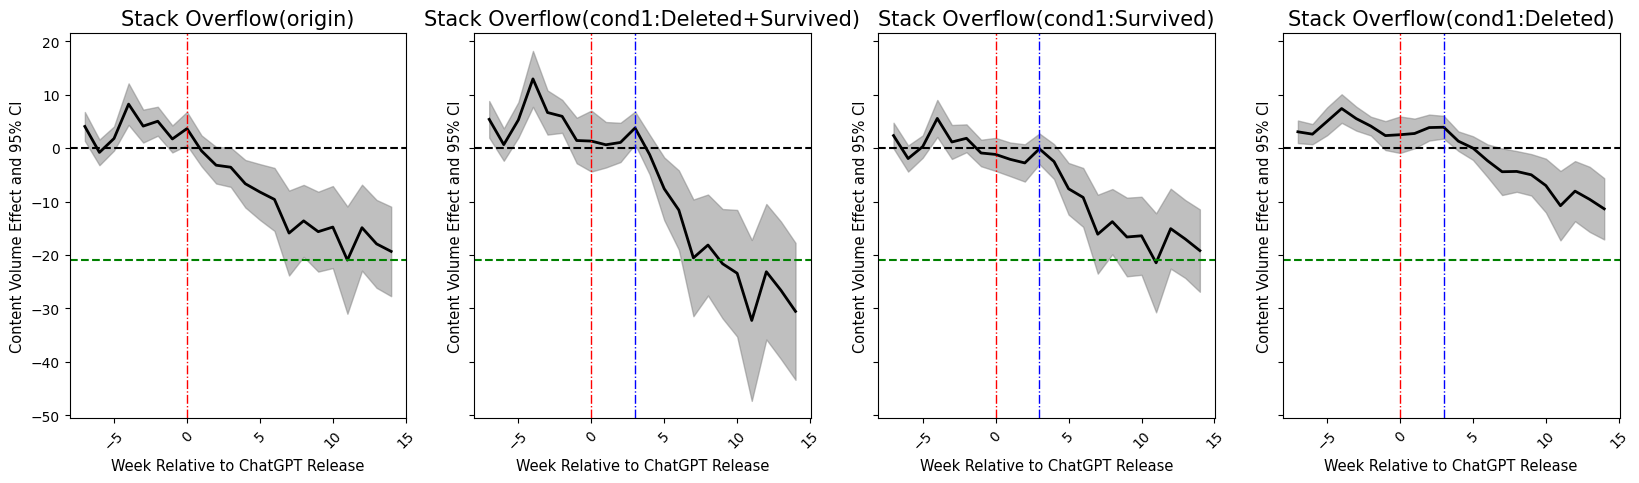

In [82]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(origin)", fontsize=15)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond1_df_coefs['period'], cond1_df_coefs['ll_95'], cond1_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond1_df_coefs['period'], cond1_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].axhline(y=0,     color='black',  linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond1:Deleted+Survived)", fontsize=15)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)


axs[2].fill_between(cond1_n_df_coefs['period'], cond1_n_df_coefs['ll_95'], cond1_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond1_n_df_coefs['period'], cond1_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond1:Survived)", fontsize=15)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)

axs[3].fill_between(cond1_y_df_coefs['period'], cond1_y_df_coefs['ll_95'], cond1_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond1_y_df_coefs['period'], cond1_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].axhline(y=-20.9, color='green',  linestyle='--')
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("Stack Overflow(cond1:Deleted)", fontsize=15)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)




plt.show();

##### Condition2

In [83]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond2_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond2_sede_yn)
cond2_result_dyn = cond2_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [84]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond2_y_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond2_sede_y)
cond2_y_result_dyn = cond2_y_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [85]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond2_n_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond2_sede_n)
cond2_n_result_dyn = cond2_n_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [86]:
# 동적 효과 계수 추출
cond2_coefs         = cond2_result_dyn.params
cond2_std_errors    = cond2_result_dyn.std_errors
cond2_conf_int      = cond2_result_dyn.conf_int()

In [87]:
# 동적 효과 계수 추출
cond2_y_coefs       = cond2_y_result_dyn.params
cond2_y_std_errors  = cond2_y_result_dyn.std_errors
cond2_y_conf_int    = cond2_y_result_dyn.conf_int()

In [88]:
# 동적 효과 계수 추출
cond2_n_coefs       = cond2_n_result_dyn.params
cond2_n_std_errors  = cond2_n_result_dyn.std_errors
cond2_n_conf_int    = cond2_n_result_dyn.conf_int()

In [89]:
cond2_coefs_filtered      = cond2_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond2_std_errors_filtered = cond2_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [90]:
cond2_y_coefs_filtered      = cond2_y_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond2_y_std_errors_filtered = cond2_y_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values



In [91]:
cond2_n_coefs_filtered      = cond2_n_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond2_n_std_errors_filtered = cond2_n_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [92]:
# 신뢰구간 계산
cond2_ll_95 = cond2_coefs_filtered - 1.965 * cond2_std_errors_filtered
cond2_ul_95 = cond2_coefs_filtered + 1.965 * cond2_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond2_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond2_coefs_filtered,
    'll_95'     : cond2_ll_95,
    'ul_95'     : cond2_ul_95
})

In [93]:
# 신뢰구간 계산
cond2_y_ll_95 = cond2_y_coefs_filtered - 1.965 * cond2_y_std_errors_filtered
cond2_y_ul_95 = cond2_y_coefs_filtered + 1.965 * cond2_y_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond2_y_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond2_y_coefs_filtered,
    'll_95'     : cond2_y_ll_95,
    'ul_95'     : cond2_y_ul_95
})

In [94]:
# 신뢰구간 계산
cond2_n_ll_95 = cond2_n_coefs_filtered - 1.965 * cond2_n_std_errors_filtered
cond2_n_ul_95 = cond2_n_coefs_filtered + 1.965 * cond2_n_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond2_n_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond2_n_coefs_filtered,
    'll_95'     : cond2_n_ll_95,
    'ul_95'     : cond2_n_ul_95
})

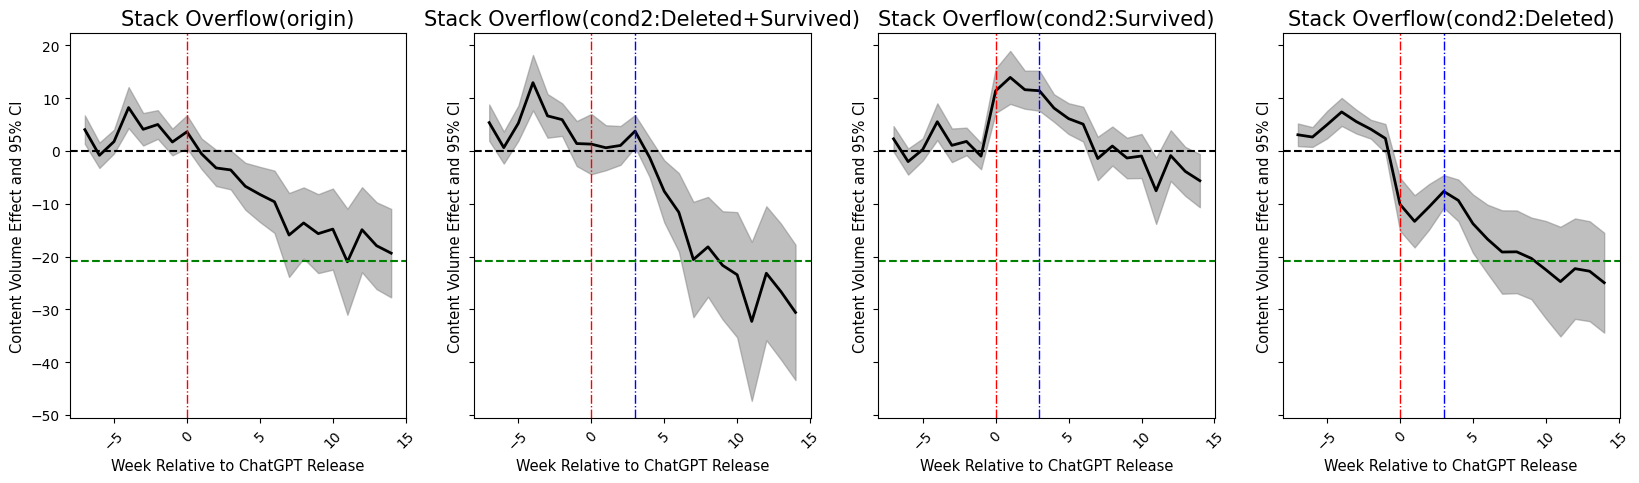

In [95]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(origin)", fontsize=15)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond2_df_coefs['period'], cond2_df_coefs['ll_95'], cond2_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond2_df_coefs['period'], cond2_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].axhline(y=0,     color='black',  linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond2:Deleted+Survived)", fontsize=15)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)


axs[2].fill_between(cond2_n_df_coefs['period'], cond2_n_df_coefs['ll_95'], cond2_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond2_n_df_coefs['period'], cond2_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond2:Survived)", fontsize=15)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)

axs[3].fill_between(cond2_y_df_coefs['period'], cond2_y_df_coefs['ll_95'], cond2_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond2_y_df_coefs['period'], cond2_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].axhline(y=-20.9, color='green',  linestyle='--')
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("Stack Overflow(cond2:Deleted)", fontsize=15)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)



plt.show();

##### Condition3

In [96]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_yn)
cond3_result_dyn = cond3_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [97]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_y_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_y)
cond3_y_result_dyn = cond3_y_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [98]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_n_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_n)
cond3_n_result_dyn = cond3_n_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [99]:
cond3_sede_y

sede_q_count rel_days  treat rel_week
sede_tag            cdate                                            
amazon_web_services 2021-10-06            23 -56 days      0       -8
                    2021-10-07            21 -55 days      0       -8
                    2021-10-08            17 -54 days      0       -8
                    2021-10-09             9 -53 days      0       -8
                    2021-10-10             7 -52 days      0       -8
...                                      ...      ...    ...      ...
vuejs               2023-03-10            10 100 days      1       14
                    2023-03-11             8 101 days      1       14
                    2023-03-12             8 102 days      1       14
                    2023-03-13            15 103 days      1       14
                    2023-03-14             8 104 days      1       14

[15778 rows x 4 columns]

In [100]:
cond3_sede_n

sede_q_count rel_days  treat rel_week
sede_tag            cdate                                            
amazon_web_services 2021-10-06            77 -56 days      0       -8
                    2021-10-07            62 -55 days      0       -8
                    2021-10-08            70 -54 days      0       -8
                    2021-10-09            33 -53 days      0       -8
                    2021-10-10            28 -52 days      0       -8
...                                      ...      ...    ...      ...
vuejs               2023-03-10            35 100 days      1       14
                    2023-03-11            18 101 days      1       14
                    2023-03-12            21 102 days      1       14
                    2023-03-13            43 103 days      1       14
                    2023-03-14            46 104 days      1       14

[15778 rows x 4 columns]

In [101]:
# 동적 효과 계수 추출
cond3_coefs = cond3_result_dyn.params
cond3_std_errors = cond3_result_dyn.std_errors
cond3_conf_int = cond3_result_dyn.conf_int()

In [102]:
# 동적 효과 계수 추출
cond3_y_coefs       = cond3_y_result_dyn.params
cond3_y_std_errors  = cond3_y_result_dyn.std_errors
cond3_y_conf_int    = cond3_y_result_dyn.conf_int()

In [103]:
# 동적 효과 계수 추출
cond3_n_coefs       = cond3_n_result_dyn.params
cond3_n_std_errors  = cond3_n_result_dyn.std_errors
cond3_n_conf_int    = cond3_n_result_dyn.conf_int()

In [104]:
cond3_coefs_filtered      = cond3_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_std_errors_filtered = cond3_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [105]:
cond3_y_coefs_filtered      = cond3_y_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_y_std_errors_filtered = cond3_y_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values



In [106]:
cond3_n_coefs_filtered      = cond3_n_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_n_std_errors_filtered = cond3_n_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [107]:
# 신뢰구간 계산
cond3_ll_95 = cond3_coefs_filtered - 1.965 * cond3_std_errors_filtered
cond3_ul_95 = cond3_coefs_filtered + 1.965 * cond3_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_coefs_filtered,
    'll_95'     : cond3_ll_95,
    'ul_95'     : cond3_ul_95
})

In [108]:
# 신뢰구간 계산
cond3_y_ll_95 = cond3_y_coefs_filtered - 1.965 * cond3_y_std_errors_filtered
cond3_y_ul_95 = cond3_y_coefs_filtered + 1.965 * cond3_y_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_y_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_y_coefs_filtered,
    'll_95'     : cond3_y_ll_95,
    'ul_95'     : cond3_y_ul_95
})

In [109]:
# 신뢰구간 계산
cond3_n_ll_95 = cond3_n_coefs_filtered - 1.965 * cond3_n_std_errors_filtered
cond3_n_ul_95 = cond3_n_coefs_filtered + 1.965 * cond3_n_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_n_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_n_coefs_filtered,
    'll_95'     : cond3_n_ll_95,
    'ul_95'     : cond3_n_ul_95
})

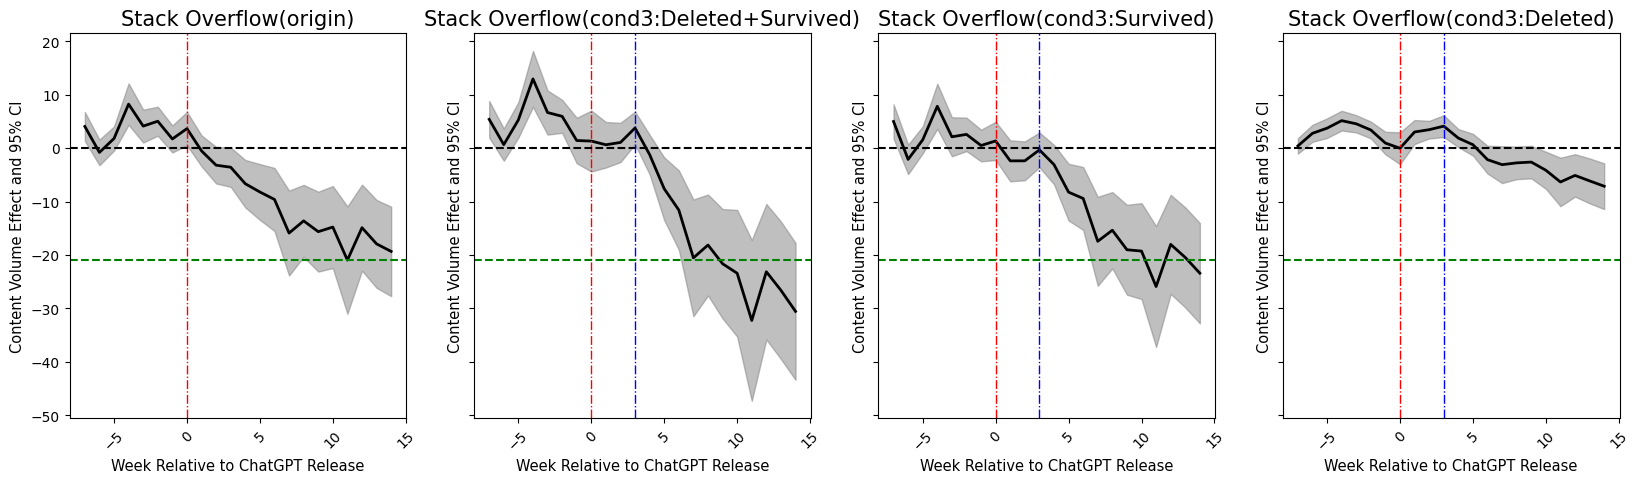

In [110]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(origin)", fontsize=15)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond3_df_coefs['period'], cond3_df_coefs['ll_95'], cond3_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_df_coefs['period'], cond3_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].axhline(y=0,     color='black',  linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond3:Deleted+Survived)", fontsize=15)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)


axs[2].fill_between(cond3_n_df_coefs['period'], cond3_n_df_coefs['ll_95'], cond3_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond3_n_df_coefs['period'], cond3_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond3:Survived)", fontsize=15)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)

axs[3].fill_between(cond3_y_df_coefs['period'], cond3_y_df_coefs['ll_95'], cond3_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond3_y_df_coefs['period'], cond3_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].axhline(y=-20.9, color='green',  linestyle='--')
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("Stack Overflow(cond3:Deleted)", fontsize=15)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)



plt.show();

##### Condition3_long

In [111]:
long_periods = np.arange(-7, 30, 1)

In [112]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_long_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_long_sede_yn)
cond3_long_result_dyn = cond3_long_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [113]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_long_y_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_long_sede_y)
cond3_long_y_result_dyn = cond3_long_y_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [114]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_long_n_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_long_sede_n)
cond3_long_n_result_dyn = cond3_long_n_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [115]:
# 동적 효과 계수 추출
cond3_long_coefs         = cond3_long_result_dyn.params
cond3_long_std_errors    = cond3_long_result_dyn.std_errors
cond3_long_conf_int      = cond3_long_result_dyn.conf_int()

In [116]:
# 동적 효과 계수 추출
cond3_long_y_coefs       = cond3_long_y_result_dyn.params
cond3_long_y_std_errors  = cond3_long_y_result_dyn.std_errors
cond3_long_y_conf_int    = cond3_long_y_result_dyn.conf_int()

In [117]:
# 동적 효과 계수 추출
cond3_long_n_coefs       = cond3_long_n_result_dyn.params
cond3_long_n_std_errors  = cond3_long_n_result_dyn.std_errors
cond3_long_n_conf_int    = cond3_long_n_result_dyn.conf_int()

In [118]:
cond3_long_sede_y

sede_q_count rel_days  treat rel_week
sede_tag            cdate                                            
amazon_web_services 2021-10-06            23 -56 days      0       -8
                    2021-10-07            21 -55 days      0       -8
                    2021-10-08            17 -54 days      0       -8
                    2021-10-09             9 -53 days      0       -8
                    2021-10-10             7 -52 days      0       -8
...                                      ...      ...    ...      ...
vuejs               2023-06-23             3 205 days      1       29
                    2023-06-24             2 206 days      1       29
                    2023-06-25             6 207 days      1       29
                    2023-06-26             8 208 days      1       29
                    2023-06-27             8 209 days      1       29

[26068 rows x 4 columns]

In [119]:
cond3_long_coefs

C(rel_week)[T.-8]          158.186589
C(rel_week)[T.-7]          157.895044
C(rel_week)[T.-6]          161.886297
C(rel_week)[T.-5]          154.119534
C(rel_week)[T.-4]          154.871720
                              ...    
C(rel_week)[T.25]:treat    -55.909621
C(rel_week)[T.26]:treat    -54.338192
C(rel_week)[T.27]:treat    -59.425656
C(rel_week)[T.28]:treat    -53.644315
C(rel_week)[T.29]:treat    -57.755102
Name: parameter, Length: 76, dtype: float64

In [120]:
cond3_long_coefs_filtered      = cond3_long_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in long_periods]].values
cond3_long_std_errors_filtered = cond3_long_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in long_periods]].values


In [121]:
cond3_long_y_coefs

C(rel_week)[T.-8]          49.233236
C(rel_week)[T.-7]          49.562682
C(rel_week)[T.-6]          47.545190
C(rel_week)[T.-5]          45.778426
C(rel_week)[T.-4]          45.886297
                             ...    
C(rel_week)[T.25]:treat   -14.355685
C(rel_week)[T.26]:treat   -17.157434
C(rel_week)[T.27]:treat   -19.827988
C(rel_week)[T.28]:treat   -17.276968
C(rel_week)[T.29]:treat   -18.848397
Name: parameter, Length: 76, dtype: float64

In [122]:
cond3_long_y_coefs_filtered      = cond3_long_y_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in long_periods]].values
cond3_long_y_std_errors_filtered = cond3_long_y_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in long_periods]].values



In [123]:
cond3_long_n_coefs_filtered      = cond3_long_n_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in long_periods]].values
cond3_long_n_std_errors_filtered = cond3_long_n_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in long_periods]].values


In [125]:
# 신뢰구간 계산
cond3_long_ll_95 = cond3_long_coefs_filtered - 1.965 * cond3_long_std_errors_filtered
cond3_long_ul_95 = cond3_long_coefs_filtered + 1.965 * cond3_long_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_long_df_coefs = pd.DataFrame({
    'period'    : long_periods,
    'Estimate'  : cond3_long_coefs_filtered,
    'll_95'     : cond3_long_ll_95,
    'ul_95'     : cond3_long_ul_95
})

In [126]:
# 신뢰구간 계산
cond3_long_y_ll_95 = cond3_long_y_coefs_filtered - 1.965 * cond3_long_y_std_errors_filtered
cond3_long_y_ul_95 = cond3_long_y_coefs_filtered + 1.965 * cond3_long_y_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_long_y_df_coefs = pd.DataFrame({
    'period'    : long_periods,
    'Estimate'  : cond3_long_y_coefs_filtered,
    'll_95'     : cond3_long_y_ll_95,
    'ul_95'     : cond3_long_y_ul_95
})

In [127]:
# 신뢰구간 계산
cond3_long_n_ll_95 = cond3_long_n_coefs_filtered - 1.965 * cond3_long_n_std_errors_filtered
cond3_long_n_ul_95 = cond3_long_n_coefs_filtered + 1.965 * cond3_long_n_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_long_n_df_coefs = pd.DataFrame({
    'period'    : long_periods,
    'Estimate'  : cond3_long_n_coefs_filtered,
    'll_95'     : cond3_long_n_ll_95,
    'ul_95'     : cond3_long_n_ul_95
})

In [128]:
cond3_long_df_coefs

,period,Estimate,ll_95,ul_95
0,-7,5.379009,1.946479,8.811538
1,-6,0.644315,-2.374954,3.663583
2,-5,5.268222,1.952879,8.583564
3,-4,12.950437,7.716587,18.184287
4,-3,6.653061,2.523282,10.782840
5,-2,5.944606,2.856868,9.032344
6,-1,1.413994,-2.842547,5.670535
7,0,1.309038,-4.397524,7.015599
8,1,0.618076,-3.639356,4.875507
9,2,1.055394,-2.618970,4.729757


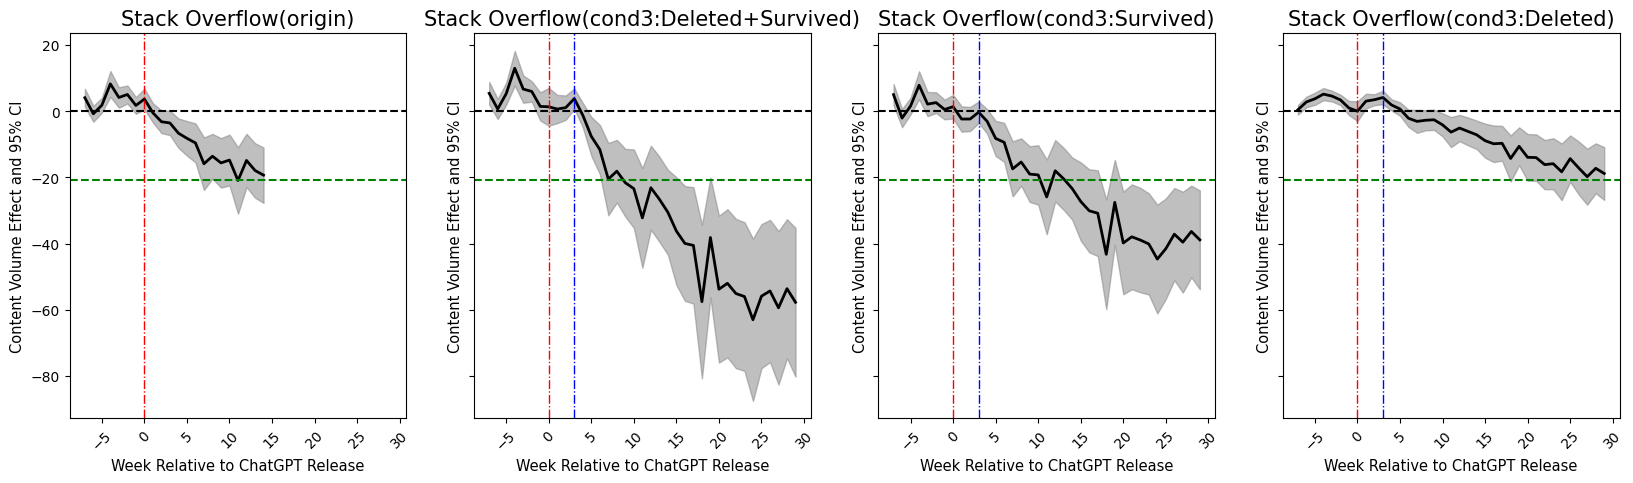

In [130]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=True)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(origin)", fontsize=15)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond3_long_df_coefs['period'], cond3_long_df_coefs['ll_95'], cond3_long_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_long_df_coefs['period'], cond3_long_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].axhline(y=0,     color='black',  linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond3:Deleted+Survived)", fontsize=15)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)


axs[2].fill_between(cond3_long_n_df_coefs['period'], cond3_long_n_df_coefs['ll_95'], cond3_long_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond3_long_n_df_coefs['period'], cond3_long_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond3:Survived)", fontsize=15)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)

axs[3].fill_between(cond3_long_y_df_coefs['period'], cond3_long_y_df_coefs['ll_95'], cond3_long_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond3_long_y_df_coefs['period'], cond3_long_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].axhline(y=-20.9, color='green',  linestyle='--')
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("Stack Overflow(cond3:Deleted)", fontsize=15)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)



plt.show();

#### 삭제된 건에 대하여

In [ ]:
df_deletedQ_cond['sur_q_cond1'] = df_deletedQ_cond['tot_q']-df_deletedQ_cond['del_q_cond1']
df_deletedQ_cond['sur_q_cond2'] = df_deletedQ_cond['tot_q']-df_deletedQ_cond['del_q_cond2']
df_deletedQ_cond['sur_q_cond3'] = df_deletedQ_cond['tot_q']-df_deletedQ_cond['del_q_cond3']

In [ ]:
df_deletedQ_cond.info()

In [ ]:
df_deletedQ_cond['cdate'] = pd.to_datetime(df_deletedQ_cond['cdate'])

In [ ]:
df_deletedQ_cond = df_deletedQ_cond.sort_values(by = ['cdate'])

In [ ]:
df_deletedQ_cond = df_deletedQ_cond[df_deletedQ_cond['cdate'] >='2013-11-30']

In [ ]:
df_deletedQ_cond = df_deletedQ_cond.reset_index(drop=True)

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (30, 5), sharey=True, sharex=True)


major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
                ,'2021-11-30', '2022-11-30', '2023-11-30']

# ax.bar(topic_per_pivot['date'], topic_per_pivot[0], width = 0.5, color='blue', label = 'Party A')
ax[0].bar(df_deletedQ_cond['cdate'], df_deletedQ_cond['sur_q_cond1'], color='blue', label = 'Survived Question')
ax[0].bar(df_deletedQ_cond['cdate'], df_deletedQ_cond['del_q_cond1'], bottom = df_deletedQ_cond['sur_q_cond1'], color = 'skyblue', label = 'Deleted Question')

ax[0].axvline([major_xticks[-2]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
ax[0].set_xticks(major_xticks)
ax[0].axhline(7000, # add vertical line
           color = 'yellow',
           linestyle = '--',
           linewidth = 1.5)
ax[0].set_title('cond1', fontsize = 15)


ax[1].bar(df_deletedQ_cond['cdate'], df_deletedQ_cond['sur_q_cond2'], color='blue', label = 'Survived Question')
ax[1].bar(df_deletedQ_cond['cdate'], df_deletedQ_cond['del_q_cond2'], bottom = df_deletedQ_cond['sur_q_cond2'], color = 'skyblue', label = 'Deleted Question')

ax[1].axvline([major_xticks[-2]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

ax[1].axhline(7000, # add vertical line
           color = 'yellow',
           linestyle = '--',
           linewidth = 1.5)
ax[1].set_xticks(major_xticks)
ax[1].set_title('cond2', fontsize = 15)


ax[2].bar(df_deletedQ_cond['cdate'], df_deletedQ_cond['sur_q_cond3'], color='blue', label = 'Survived Question')
ax[2].bar(df_deletedQ_cond['cdate'], df_deletedQ_cond['del_q_cond3'], bottom = df_deletedQ_cond['sur_q_cond3'], color = 'skyblue', label = 'Deleted Question')

ax[2].axvline([major_xticks[-2]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)

ax[2].axhline(7000, # add vertical line
           color = 'yellow',
           linestyle = '--',
           linewidth = 1.5)
ax[2].set_xticks(major_xticks)
ax[2].legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))
ax[2].set_title('cond3', fontsize = 15)


ax[0].tick_params(axis='x', rotation=45)
ax[1].tick_params(axis='x', rotation=45)
ax[2].tick_params(axis='x', rotation=45)
plt.show();


In [ ]:
treat0 = df_deletedQ_cond[(df_deletedQ_cond['cdate']>= '2021-10-06') & (df_deletedQ_cond['cdate']<= '2022-03-15')]

treat1 = df_deletedQ_cond[(df_deletedQ_cond['cdate']>= '2022-10-05') & (df_deletedQ_cond['cdate']<= '2023-03-14')]


In [ ]:
treat0_list = [
 '2021-10-06',
 '2021-10-13',
 '2021-10-20',
 '2021-10-27',
 '2021-11-03',
 '2021-11-10',
 '2021-11-17',
 '2021-11-24',
 '2021-12-01',
 '2021-12-08',
 '2021-12-15',
 '2021-12-22',
 '2021-12-29',
 '2022-01-05',
 '2022-01-12',
 '2022-01-19',
 '2022-01-26',
 '2022-02-02',
 '2022-02-09',
 '2022-02-16',
 '2022-02-23',
 '2022-03-02',
 '2022-03-09']
treat1_list = ['2022-10-05',
 '2022-10-12',
 '2022-10-19',
 '2022-10-26',
 '2022-11-02',
 '2022-11-09',
 '2022-11-16',
 '2022-11-23',
 '2022-11-30',
 '2022-12-07',
 '2022-12-14',
 '2022-12-21',
 '2022-12-28',
 '2023-01-04',
 '2023-01-11',
 '2023-01-18',
 '2023-01-25',
 '2023-02-01',
 '2023-02-08',
 '2023-02-15',
 '2023-02-22',
 '2023-03-01',
 '2023-03-08']

In [ ]:
treat1[treat1['cdate'] =='2022-11-30']

In [ ]:
treat1[treat1['cdate'] =='2022-11-30']

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (40, 30), sharey=True, sharex=False)

# ax.bar(topic_per_pivot['date'], topic_per_pivot[0], width = 0.5, color='blue', label = 'Party A')
ax[0][0].bar(treat0['cdate'], treat0['sur_q_cond1'], color='blue', label = 'Survived Question')
ax[0][0].bar(treat0['cdate'], treat0['del_q_cond1'], bottom = treat0['sur_q_cond1'], color = 'skyblue', label = 'Deleted Question')

ax[0][0].axvline([treat0_list[8]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 2)
           
ax[0][0].axvline([treat0_list[12]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 2)
ax[0][0].set_title('treatment0 : cond1', fontsize = 15)
ax[0][0].set_xticks(treat0_list)


ax[0][1].bar(treat1['cdate'], treat1['sur_q_cond1'], color='blue', label = 'Survived Question')
ax[0][1].bar(treat1['cdate'], treat1['del_q_cond1'], bottom = treat1['sur_q_cond1'], color = 'skyblue', label = 'Deleted Question')

ax[0][1].axvline([treat1_list[8]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 2)

ax[0][1].axvline([treat1_list[12]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 2)
ax[0][1].set_title('treatment1 : cond1', fontsize = 15)
ax[0][1].set_xticks(treat1_list)

ax[0][0].tick_params(axis='x', rotation=45)
ax[0][1].tick_params(axis='x', rotation=45)

##########################################################


ax[1][0].bar(treat0['cdate'], treat0['sur_q_cond2'], color='blue', label = 'Survived Question')
ax[1][0].bar(treat0['cdate'], treat0['del_q_cond2'], bottom = treat0['sur_q_cond2'], color = 'skyblue', label = 'Deleted Question')

ax[1][0].axvline([treat0_list[8]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 2)
ax[1][0].axvline([treat0_list[12]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 2)
ax[1][0].set_title('treatment0 : cond2', fontsize = 15)
ax[1][0].set_xticks(treat0_list)

ax[1][1].bar(treat1['cdate'], treat1['sur_q_cond2'], color='blue', label = 'Survived Question')
ax[1][1].bar(treat1['cdate'], treat1['del_q_cond2'], bottom = treat1['sur_q_cond2'], color = 'skyblue', label = 'Deleted Question')

ax[1][1].axvline([treat1_list[8]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 2)

ax[1][1].axvline([treat1_list[12]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 2)
ax[1][1].set_title('treatment1 : cond2', fontsize = 15)
ax[1][1].set_xticks(treat1_list)

ax[1][0].tick_params(axis='x', rotation=45)
ax[1][1].tick_params(axis='x', rotation=45)

##########################################################

ax[2][0].bar(treat0['cdate'], treat0['sur_q_cond3'], color='blue', label = 'Survived Question')
ax[2][0].bar(treat0['cdate'], treat0['del_q_cond3'], bottom = treat0['sur_q_cond3'], color = 'skyblue', label = 'Deleted Question')

ax[2][0].axvline([treat0_list[8]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 2)

ax[2][0].axvline([treat0_list[12]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 2)
ax[2][0].legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))
ax[2][0].set_title('treatment0 : cond3', fontsize = 15)
ax[2][0].set_xticks(treat0_list)


ax[2][1].bar(treat1['cdate'], treat1['sur_q_cond3'], color='blue', label = 'Survived Question')
ax[2][1].bar(treat1['cdate'], treat1['del_q_cond3'], bottom = treat1['sur_q_cond3'], color = 'skyblue', label = 'Deleted Question')

ax[2][1].axvline([treat1_list[8]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 2)

ax[2][1].axvline([treat1_list[12]], # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 2)
ax[2][1].legend( title_fontsize = 10, fontsize = 10,
          bbox_to_anchor = (1, 0.55))
ax[2][1].set_title('treatment1 : cond3', fontsize = 15)
ax[2][1].set_xticks(treat1_list)

ax[2][0].tick_params(axis='x', rotation=45)
ax[2][1].tick_params(axis='x', rotation=45)

plt.show();


#### Q3.

Condition4

In [ ]:
df_postcnt_per_tag_01['q_count'] = df_postcnt_per_tag_01['q_count'].astype(int)
## 여쭤보기...내려도 되는지...?

In [ ]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond4_mod_quest_vol_so_dyn = PanelOLS.from_formula('q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=df_postcnt_per_tag_01)
cond4_result_dyn = cond4_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [ ]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond5_mod_quest_vol_so_dyn = PanelOLS.from_formula('q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=df_postcnt_per_tag_not_calc_01)
cond5_result_dyn = cond5_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [ ]:
# 동적 효과 계수 추출
cond4_coefs         = cond4_result_dyn.params
cond4_std_errors    = cond4_result_dyn.std_errors
cond4_conf_int      = cond4_result_dyn.conf_int()

In [ ]:
# 동적 효과 계수 추출
cond5_coefs         = cond5_result_dyn.params
cond5_std_errors    = cond5_result_dyn.std_errors
cond5_conf_int      = cond5_result_dyn.conf_int()

In [ ]:
cond4_coefs_filtered      = cond4_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond4_std_errors_filtered = cond4_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [ ]:
cond5_coefs_filtered      = cond5_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond5_std_errors_filtered = cond5_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [ ]:
cond5_coefs_filtered

In [ ]:
# 신뢰구간 계산
cond4_ll_95 = cond4_coefs_filtered - 1.965 * cond4_std_errors_filtered
cond4_ul_95 = cond4_coefs_filtered + 1.965 * cond4_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond4_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond4_coefs_filtered,
    'll_95'     : cond4_ll_95,
    'ul_95'     : cond4_ul_95
})

In [ ]:
# 신뢰구간 계산
cond5_ll_95 = cond5_coefs_filtered - 1.965 * cond5_std_errors_filtered
cond5_ul_95 = cond5_coefs_filtered + 1.965 * cond5_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond5_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond5_coefs_filtered,
    'll_95'     : cond5_ll_95,
    'ul_95'     : cond5_ul_95
})

In [ ]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 3, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[0].axhline(y=0, color='black', linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(original)", fontsize=16)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)


axs[1].fill_between(cond2_n_df_coefs['period'], cond2_n_df_coefs['ll_95'], cond2_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond2_n_df_coefs['period'], cond2_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond1:Survived)", fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)


axs[2].fill_between(cond4_df_coefs['period'], cond4_df_coefs['ll_95'], cond4_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond4_df_coefs['period'], cond4_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond4:Survived)", fontsize=16)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)


plt.show();

In [ ]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=sharex)

axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[0].axhline(y=0, color='black', linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow", fontsize=16)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond3_df_coefs['period'], cond3_df_coefs['ll_95'], cond3_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_df_coefs['period'], cond3_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(replication : survived )", fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)


axs[2].fill_between(cond4_df_coefs['period'], cond4_df_coefs['ll_95'], cond4_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond4_df_coefs['period'], cond4_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond4)", fontsize=16)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)

axs[3].fill_between(cond5_df_coefs['period'], cond5_df_coefs['ll_95'], cond5_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond5_df_coefs['period'], cond5_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("Stack Overflow(cond5)", fontsize=16)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)

plt.show();

In [ ]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_yn)
cond3_result_dyn = cond3_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [ ]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_y_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_y)
cond3_y_result_dyn = cond3_y_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [ ]:
# 고정 효과 모델 (tag를 고정 효과로 포함하고, rel_week도 설명 변수로 포함)
cond3_n_mod_quest_vol_so_dyn = PanelOLS.from_formula('sede_q_count ~ C(rel_week) * treat + EntityEffects',
                                             data=cond3_sede_n)
cond3_n_result_dyn = cond3_n_mod_quest_vol_so_dyn.fit(cov_type='clustered', cluster_entity=True)


In [ ]:
cond3_sede_y

In [ ]:
cond3_sede_n

In [ ]:
# 동적 효과 계수 추출
cond3_y_coefs       = cond3_y_result_dyn.params
cond3_y_std_errors  = cond3_y_result_dyn.std_errors
cond3_y_conf_int    = cond3_y_result_dyn.conf_int()

In [ ]:
# 동적 효과 계수 추출
cond3_n_coefs       = cond3_n_result_dyn.params
cond3_n_std_errors  = cond3_n_result_dyn.std_errors
cond3_n_conf_int    = cond3_n_result_dyn.conf_int()

In [ ]:
cond3_y_coefs

In [ ]:
cond3_n_coefs

In [ ]:
# 동적 효과 계수 추출
cond3_coefs = cond3_result_dyn.params
cond3_std_errors = cond3_result_dyn.std_errors
cond3_conf_int = cond3_result_dyn.conf_int()

In [ ]:
cond3_coefs_filtered      = cond3_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_std_errors_filtered = cond3_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [ ]:
cond3_y_coefs_filtered      = cond3_y_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_y_std_errors_filtered = cond3_y_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values



In [ ]:
cond3_n_coefs_filtered      = cond3_n_coefs.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values
cond3_n_std_errors_filtered = cond3_n_std_errors.loc[[f'C(rel_week)[T.{i}]:treat' for i in periods]].values


In [ ]:
# 신뢰구간 계산
cond3_ll_95 = cond3_coefs_filtered - 1.965 * cond3_std_errors_filtered
cond3_ul_95 = cond3_coefs_filtered + 1.965 * cond3_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_coefs_filtered,
    'll_95'     : cond3_ll_95,
    'ul_95'     : cond3_ul_95
})

In [ ]:
# 신뢰구간 계산
cond3_y_ll_95 = cond3_y_coefs_filtered - 1.965 * cond3_y_std_errors_filtered
cond3_y_ul_95 = cond3_y_coefs_filtered + 1.965 * cond3_y_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_y_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_y_coefs_filtered,
    'll_95'     : cond3_y_ll_95,
    'ul_95'     : cond3_y_ul_95
})

In [ ]:
# 신뢰구간 계산
cond3_n_ll_95 = cond3_n_coefs_filtered - 1.965 * cond3_n_std_errors_filtered
cond3_n_ul_95 = cond3_n_coefs_filtered + 1.965 * cond3_n_std_errors_filtered

# 데이터프레임 생성 (계수와 신뢰구간)
cond3_n_df_coefs = pd.DataFrame({
    'period'    : periods,
    'Estimate'  : cond3_n_coefs_filtered,
    'll_95'     : cond3_n_ll_95,
    'ul_95'     : cond3_n_ul_95
})

In [ ]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 4, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(df_coefs['period'], df_coefs['ll_95'], df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(df_coefs['period'], df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(replication)", fontsize=16)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond3_df_coefs['period'], cond3_df_coefs['ll_95'], cond3_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_df_coefs['period'], cond3_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[1].axhline(y=0,     color='black',  linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond3)", fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)

axs[2].fill_between(cond3_y_df_coefs['period'], cond3_y_df_coefs['ll_95'], cond3_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond3_y_df_coefs['period'], cond3_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond3 & deleted)", fontsize=16)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)


axs[3].fill_between(cond3_n_df_coefs['period'], cond3_n_df_coefs['ll_95'], cond3_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[3].plot(cond3_n_df_coefs['period'], cond3_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[3].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[3].axhline(y=0, color='black', linestyle='--')
axs[3].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[3].axhline(y=-20.9, color='green',  linestyle='--')
axs[3].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[3].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[3].set_title("Stack Overflow(cond3 & survived)", fontsize=16)
axs[3].tick_params(axis='x', rotation=45)
axs[3].grid(False)



plt.show();

In [ ]:
### create a figure with multiple subplots
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 3, figsize = (20, 5), sharey=sharey, sharex=sharex)


axs[0].fill_between(cond3_df_coefs['period'], cond3_df_coefs['ll_95'], cond3_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[0].plot(cond3_df_coefs['period'], cond3_df_coefs['Estimate'], color='black', linewidth=2)
axs[0].axvline(x=0,     color='red',    linestyle='-.', linewidth=1)
axs[0].axhline(y=0,     color='black',  linestyle='--')
axs[0].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[0].axhline(y=-20.9, color='green',  linestyle='--')
axs[0].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[0].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[0].set_title("Stack Overflow(cond3)", fontsize=16)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(False)

axs[1].fill_between(cond3_y_df_coefs['period'], cond3_y_df_coefs['ll_95'], cond3_y_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[1].plot(cond3_y_df_coefs['period'], cond3_y_df_coefs['Estimate'], color='black', linewidth=2)
axs[1].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[1].axhline(y=-20.9, color='green',  linestyle='--')
axs[1].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[1].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[1].set_title("Stack Overflow(cond3 & deleted)", fontsize=16)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(False)


axs[2].fill_between(cond3_n_df_coefs['period'], cond3_n_df_coefs['ll_95'], cond3_n_df_coefs['ul_95'], color='gray', alpha=0.5)
axs[2].plot(cond3_n_df_coefs['period'], cond3_n_df_coefs['Estimate'], color='black', linewidth=2)
axs[2].axvline(x=0, color='red', linestyle='-.', linewidth=1)
axs[2].axhline(y=0, color='black', linestyle='--')
axs[2].axvline(x=3, color='blue', linestyle='-.', linewidth=1)
axs[2].axhline(y=-20.9, color='green',  linestyle='--')
axs[2].set_xlabel("Week Relative to ChatGPT Release", fontsize = 10.5)
axs[2].set_ylabel("Content Volume Effect and 95% CI", fontsize = 10.5)
axs[2].set_title("Stack Overflow(cond3 & survived)", fontsize=16)
axs[2].tick_params(axis='x', rotation=45)
axs[2].grid(False)



plt.show();

tag

In [ ]:
df_da['date']   = df_da['q_creationdate'].dt.date
df_da['year']   = df_da['q_creationdate'].dt.year
df_da['month']  = df_da['q_creationdate'].dt.month
df_da['day']    = df_da['q_creationdate'].dt.day

In [ ]:
df_da_q = df_da[['q_id', 'q_creationdate','q_tags']].drop_duplicates()

In [ ]:
df_da_q['year'] = df_da_q['q_creationdate'].dt.year
df_da_q['month'] = df_da_q['q_creationdate'].dt.month
df_da_q['day'] = df_da_q['q_creationdate'].dt.day
df_da_q['date'] = df_da_q['q_creationdate'].dt.date

In [ ]:
df_da_q['q_tags_list'] = df_da_q['q_tags'].apply(lambda x : x.strip().split(' '))

In [ ]:
print(df_da_q[['q_id']].shape)
print(df_da_q[['q_id']].drop_duplicates().shape)

In [ ]:
df_da_q = df_da_q.reset_index(drop=True)

In [ ]:
df_da_q_ex = df_da_q[['q_id', 'q_tags_list']].apply(pd.Series.explode)

In [ ]:
df_da_q_ex['q_tags_list'].value_counts().head(20)

In [ ]:
df_da_q_ex

In [ ]:
df_da_q['q_tagslen'] = df_da_q['q_tags'].apply(lambda x : len(x.strip().split(' ')))

In [ ]:
df_da_q_year = pd.merge(df_da_q[['q_id', 'year']], df_da_q_ex, on = 'q_id')

In [ ]:
df_da_q_year = df_da_q_year.groupby(['year','q_tags_list']).count()['q_id'].reset_index()
#  df_da.sort_values(by = ['date', 'q_id','qna_diff'], ascending=True).groupby(['date', 'q_id']).head(1) > 확인필요 

In [ ]:
df_da_q_year = df_da_q_year.sort_values(by = ['year', 'q_id'], ascending = False).groupby(['year']).head(10)

In [ ]:
df_da_q_year['year'] = df_da_q_year['year'].astype(str)

In [ ]:
# df_postcnt_per_tag_year

df_postcnt_per_tag_year_melt = df_postcnt_per_tag_year.melt(id_vars = ['year'], value_vars=df_postcnt_per_tag_year.columns[1:])

In [ ]:
# df_da_q_year.sort_values(by = ['year', 'q_id'], ascending = False).groupby(['year']).head(10)
df_postcnt_top10 = df_postcnt_per_tag_year_melt.sort_values(by = ['year', 'value'], ascending=False).groupby(['year']).head(10)

In [ ]:
df_postcnt_top10

In [ ]:
### create a figure with multiple subplots


sharey = True ## 또는 sharey=False
sharex = False ## 또는 sharex=False

fig, axs = plt.subplots(10, 2, figsize = (10, 40), sharey=sharey, sharex=sharex)

for x in range(0, 10):
        standard_year = 2014
        loop_year = str(standard_year + (x*1))
        print(loop_year)
    
        axs[x][0].bar(df_da_q_year[df_da_q_year['year'] ==loop_year].q_tags_list
                        ,  df_da_q_year[df_da_q_year['year'] ==loop_year].q_id
                        ,  color = 'skyblue'
                ) # hist type
        axs[x][0].set_title(str(loop_year), # add title
                pad = 10,
                loc = 'center')
        axs[x][0].tick_params(axis='x', rotation=45)

        axs[x][1].bar( df_postcnt_top10[df_postcnt_top10['year'] ==loop_year].variable
                ,  df_postcnt_top10[df_postcnt_top10['year'] ==loop_year].value
                ,  color = 'pink'
                ) # hist type
        axs[x][1].set_title(str(loop_year), # add title
                pad = 10,
                loc = 'center')
        axs[x][1].tick_params(axis='x', rotation=45)
 
# plt.suptitle("Top 10 Tags of Questions over 10 years")      
plt.tight_layout()    
plt.show();

In [ ]:
# 왼쪽이 tag를 1로 계산한 경우, 오른쪽이 질문별로 태그의 비중을 계산하여 1/n으로 계산한 경우 시각화 

# * 왼쪽 그래프와 오른쪽 그래프 사이의 갭이 클수록 곁다리 태그이다.(하나의 질문에 여러개의 태그가 들어가서 가중치가 작아지는 경우)
#     * 프론트에서는 자바스크립트가 아직도 절대적이기 때문에, 모든 프론트앤드 관련 질문에 javascript에 껴있을 수 있음 

# * ios, android의 경우 순위가 높아진 경우인데, 오히려 범용적이지 않기 때문에 순위가 높아졌다고 해석할 수 있음
# (java는 웹 앱 다 쓰인다고 하면 안드로이드는 특정 플랫폼만을 의미하므로)
# * c++도의 경우 웹프로그래밍이 불가능한 언어로 범용성이 떨어짐(기업에서 안씀) > 특정 임베디드와같은 목적성이 있는 곳에서 쓰임 

# * 2017년 이후 r등장 (왼쪽그래프에는 없으나 오른쪽 그래프에만 존재)

# * c#은 왜 많을까?(지운님께 물어보기) pos나 의료기기에서 C#많이씀

# * 2021년 부터 등장하는 pandas의 경우 python이랑 같이 나오므로 좌측에는 있으라 우측에는 없음 

# * reactjs는 자바스크립트의 하위라이브러리로 같이 묶여서 나올 가능성이 높음


